# Feature Extraction and Price Prediction For Mobile Phones

## Data Exploration:
### Begin by loading and exploring the dataset to understand its structure, data types, and the range of values for each feature.  

#### Import Libraries

In [126]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')
# Data
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2, f_regression

from sklearn import svm

#### Load The Data

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
# Load the Dataset
df = pd.read_csv('/content/drive/My Drive/Project 4/Processed_Flipdata.csv')

#### Display few rows of data

In [129]:
# View the first few rows of the data

df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


### Range of Values For Eeach Features

In [130]:
# range of values for each feature

for column in df.columns:
  print(f"Feature: {column}")
  print(f"Range: {df[column].min()} - {df[column].max()}")
  print("-" * 20)


Feature: Unnamed: 0
Range: 0 - 642
--------------------
Feature: Model
Range: APPLE iPhone 11 - vivo Y75
--------------------
Feature: Colour
Range: 7Â° Purple - chalk
--------------------
Feature: Memory
Range: 16 - 256
--------------------
Feature: RAM
Range: 2 - 8
--------------------
Feature: Battery_
Range: 800 - 7000
--------------------
Feature: Rear Camera
Range: 0MP - 8MP
--------------------
Feature: Front Camera
Range: 0MP - 8MP
--------------------
Feature: AI Lens
Range: 0 - 1
--------------------
Feature: Mobile Height
Range: 4.5 - 41.94
--------------------
Feature: Processor_
Range: 0 0 0 208MHz - snapdragon 888
--------------------
Feature: Prize
Range: 1,199 - 920
--------------------


In [131]:
#  Get the shape of the data (number of rows, number of columns)

df.shape

(541, 12)

#### Information about DataFrame

In [132]:
# Get information about columns and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


#### Summery of Dataset Distribution

In [133]:
# Get summary statistics of the numerical columns

df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


In [134]:
# In above datasets Mobile hight should be investigated more deeply

In [135]:
# Dataset columns

col = df.columns
col

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [136]:
# Dimension of the dataset

df.ndim

2

#### Unique Elements In Each Columns

In [137]:
# Number of uniqe elements in each columns
unique = df.nunique()
unique.to_frame().T

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,541,187,275,5,5,37,14,13,2,38,123,158


In [138]:
# 1. unique.to_frame()`: Converts the `unique` Series into a DataFrame. This is necessary to apply the transpose operation.
# 2. T: Transposes the DataFrame. This flips the rows and columns, making it easier to read and analyze the unique value counts for each column.

## Data Preprocessing:
Handle any missing values, outliers, or inconsistencies in the dataset.
Convert categorical variables (e.g., model, colour) into a suitable numerical format, such as one-hot encoding.

#### Check the Duplicate

In [139]:
# check the duplicated
df.duplicated().sum()

0

In [140]:
# check the null values

df.isnull().sum()

,0
Unnamed: 0,0
Model,0
Colour,0
Memory,0
RAM,0
Battery_,0
Rear Camera,0
Front Camera,0
AI Lens,0
Mobile Height,0


#### Drop unnecessory columns

In [141]:
# Drop the Unnamed: columns

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [142]:
df.head(2)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"


## Handle inconsistencies in data

In [143]:
# In the Prize column we should remove the ',' and also address the prize below
# 4999

In [144]:
df['Prize'] = df['Prize'].str.replace(',', '')

In [145]:
# we need to convert Prize column to int type

In [146]:
df['Prize'] = df['Prize'].astype(int)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.6+ KB


In [148]:
df['Prize'].describe()

,Prize
count,541.000000
mean,16228.375231
std,10793.588322
min,920.000000
25%,9290.000000
50%,13499.000000
75%,19280.000000
max,80999.000000


In [149]:
# Mobile height in CM

df['Mobile Height'].describe()

,Mobile Height
count,541.000000
mean,16.431201
std,2.523553
min,4.500000
25%,16.510000
50%,16.710000
75%,16.940000
max,41.940000


In [150]:
df['Mobile Height'].unique()

array([16.76, 16.64, 16.56, 17.02, 16.51, 16.71, 17.04, 16.21, 16.94,
       16.33, 41.94, 17.07,  4.5 ,  7.11, 16.26,  6.1 , 15.6 , 16.81,
        5.08, 16.59, 16.43, 16.66, 17.22, 16.36, 17.32, 15.46,  4.57,
       16.54, 15.49, 16.  , 15.7 , 16.69, 15.8 , 13.84, 17.53, 16.55,
       17.65, 12.7 ])

In [151]:
df['Mobile Height'].median()

16.71

### Handling the Outlier and Duplicate values

#### Cheking the outliers in some columns only as per observation

In [152]:

Q1 = df['Mobile Height'].quantile(0.25)
Q3 = df['Mobile Height'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Mobile Height'] < lower_bound) | (df['Mobile Height'] > upper_bound)]
print(outliers['Mobile Height'])


75     41.94
88     41.94
98      4.50
108     7.11
116     4.50
118     4.50
133     6.10
135    15.60
136    15.60
152     5.08
155     4.50
156     6.10
181     4.50
182     4.50
193     6.10
243    15.46
244     6.10
245     4.50
246     4.57
247     4.57
250     6.10
308    15.49
309    15.49
327    15.49
418    15.70
456    15.80
460    13.84
466    13.84
474    15.49
511    17.65
532    15.49
536    15.49
537    12.70
Name: Mobile Height, dtype: float64


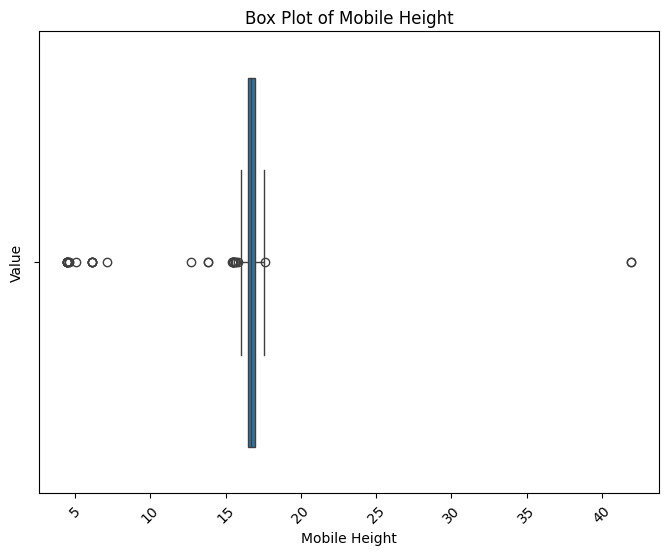

In [153]:
# visualize the outliers by box plot

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Mobile Height'])
plt.title('Box Plot of Mobile Height')
plt.xlabel('Mobile Height')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


In [154]:
# as per the unique values of mobile height and outlier by IQR there is no such mobiles with 41 cm
# hight so better to change with average height I also consider minimum mobile
# height is 12.7 rest is better to remove

In [155]:
# find height above 40 cm

above_40= df['Mobile Height'][df['Mobile Height'] > 40]
print(above_40)
num_above_40 = len(above_40)

print("Number of mobile height above 40 cm:", num_above_40)

75    41.94
88    41.94
Name: Mobile Height, dtype: float64
Number of mobile height above 40 cm: 2


#### Boolean Masking

In [156]:
# Replace height above 40 cm with median by using boolean mask

df['Mobile Height'][df['Mobile Height'] > 40] = 16.71

In [157]:
# Above id filtering the 'Mobile Height' column in the DataFrame 'df' to find all
# values greater than 40.
# It substitutes those outlier heights with the value 16.71, likely chosen based
# on domain knowledge or a statistical measure like the median.

In [158]:
df['Mobile Height'].describe()

,Mobile Height
count,541.000000
mean,16.337930
std,1.987434
min,4.500000
25%,16.510000
50%,16.710000
75%,16.810000
max,17.650000


In [159]:
# I decided to remove List of rows on the basis of mobile height and IQR which
# is less than 13

df[df['Mobile Height'] < 13]


,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
98,Micromax IN 2C,Nebula Blue,128,6,800,0MP,0MP,0,4.50,SC6531E,1449
108,micromax 2,Blade Silver,128,8,1900,2MP,0MP,0,7.11,SC6531E,1849
116,micromax,OMG Black,128,4,1000,0MP,0MP,0,4.50,SC6531E,1422
118,micromax 1,Eclipse Black,256,8,800,0MP,0MP,0,4.50,SC6531E,1299
133,Micromax 3,OMG Black,128,4,1020,2MP,0MP,0,6.10,MediaTek,2615
152,micromax 3,Racing Black,64,4,800,2MP,0MP,0,5.08,0 0 0 208MHz,2490
155,micromax 2,Nebula Green,256,8,800,0MP,0MP,0,4.50,SC6531E,1299
156,micromax 3,Nebula Green,256,4,1020,2MP,0MP,0,6.10,MediaTek,2499
181,micromax,Light Silver,32,3,2550,0MP,0MP,0,4.50,SC6531E,1375
182,micromax1,Light Silver,32,3,800,0MP,0MP,0,4.50,SC6531E,1599


In [160]:
# As per the list above I found that something wrong either in model name,
# battery, mobile height, processor name and price so better to drop these rows

#### Drop the outliers which shows in box plot by IQR

In [161]:
df.drop(df[df['Mobile Height'] < 13].index, inplace=True)

In [162]:
df.shape

(524, 11)

In [163]:
df.head(2)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299


### Handling some categorical columns

In [164]:
# Remove MP from Rear Camera and Front Camera

df['Rear Camera'] = df['Rear Camera'].str.replace('MP', '')
df['Front Camera'] = df['Front Camera'].str.replace('MP', '')

In [165]:
df.head(2)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299


### Rename the columns

In [166]:
# Rename the column name of Rear Camera to Rear Camera in MP and Front Camera in MP and Battery_ to Battery and Processor_ to Processor

df.rename(columns={'Rear Camera': 'RearCameraMP'}, inplace=True)
df.rename(columns={'Front Camera': 'FrontCameraMP'}, inplace=True)
df.rename(columns={'Battery_': 'Battery'}, inplace=True)
df.rename(columns={'Processor_': 'Processor'}, inplace=True)
df.rename(columns={'Mobile Height':'MobileHeight'},inplace=True)
df.rename(columns={'Memory':'ROM'},inplace=True)
df.rename(columns={'AI Lens':'AILens'},inplace=True)
df.rename(columns={'Prize':'Price'},inplace=True)



### Convert object to Integer

In [167]:
# convert object to integer

df['RearCameraMP'] = df['RearCameraMP'].astype(int)
df['FrontCameraMP'] = df['FrontCameraMP'].astype(int)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          524 non-null    object 
 1   Colour         524 non-null    object 
 2   ROM            524 non-null    int64  
 3   RAM            524 non-null    int64  
 4   Battery        524 non-null    int64  
 5   RearCameraMP   524 non-null    int64  
 6   FrontCameraMP  524 non-null    int64  
 7   AILens         524 non-null    int64  
 8   MobileHeight   524 non-null    float64
 9   Processor      524 non-null    object 
 10  Price          524 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 49.1+ KB


In [169]:
df.head()

,Model,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Processor,Price
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999


### Again Drop Duplicated values

In [170]:
# again check duplicated rows

df.duplicated().sum()


9

In [171]:
# show duplicated rows

df[df.duplicated(keep=False)]


,Model,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Processor,Price
23,vivo T2x 5G,Marine Blue,128,6,5000,50,8,0,16.71,Dimensity 6020,13999
27,vivo T2x 5G,Marine Blue,128,6,5000,50,8,0,16.71,Dimensity 6020,13999
46,MOTOROLA e32,Arctic Blue,64,4,5000,50,8,0,16.51,Mediatek Helio G37,7999
48,MOTOROLA e32,Arctic Blue,64,4,5000,50,8,0,16.51,Mediatek Helio G37,7999
90,SAMSUNG Galaxy F14 5G,B.A.E. Purple,128,4,6000,50,13,0,16.76,"Exynos 1330, Octa Core",13490
91,SAMSUNG Galaxy F14 5G,B.A.E. Purple,128,4,6000,50,13,0,16.76,"Exynos 1330, Octa Core",13490
130,SAMSUNG Galaxy F14 5G,OMG Black,128,6,6000,50,13,0,16.76,"Exynos 1330, Octa Core",14490
132,SAMSUNG Galaxy F14 5G,OMG Black,128,6,6000,50,13,0,16.76,"Exynos 1330, Octa Core",14490
332,Tecno Spark 9T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9290
344,Tecno Spark 9T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9290


In [172]:
# Remove Duplicate row permanently
df.drop_duplicates(inplace=True)


In [173]:
df.duplicated().sum()

0

In [174]:
df.shape

(515, 11)

In [175]:
df.head()

,Model,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Processor,Price
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999


## Feature Engineering

### Split the Model column into Compnay and ModelName

In [176]:
# Split the 'Model' column into 'Company' and 'ModelName'
df[['Company', 'ModelName']] = df['Model'].str.split(' ', n=1, expand=True)


In [177]:
# Drop the 'Model' column
df.drop('Model', axis=1, inplace=True)


In [178]:
df.head(2)

,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Processor,Price,Company,ModelName
0,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Infinix,SMART 7
1,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Infinix,SMART 7


### Handle Inconsistencies in columns

#### Handle some incorrect name in processor column, company column and modelname column for better visualization

---



In [179]:
# showing apple phones only

df[df['Company'] == 'APPLE']

,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Processor,Price,Company,ModelName
474,Black,64,8,3110,12,12,0,15.49,ios,41199,APPLE,iPhone 11
493,Midnight,128,6,4323,12,12,0,17.02,IOS,80999,APPLE,iPhone 14 Plus
520,Purple,128,3,4323,12,12,0,17.02,6 Core,80999,APPLE,iPhone 14 Plus
525,Starlight,128,4,4323,12,12,0,17.02,ios,80999,APPLE,iPhone 14 Plus
532,Blue,64,8,2815,12,12,0,15.49,ios,53999,APPLE,iPhone 12


In [180]:
# changing some name of processor in Apple company

# Filter the DataFrame to select rows where the 'Company' column is 'APPLE'
df.loc[df['Company'] == 'APPLE', 'Processor'] = 'ios'

In [181]:
df[df['Company'] == 'APPLE']


,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Processor,Price,Company,ModelName
474,Black,64,8,3110,12,12,0,15.49,ios,41199,APPLE,iPhone 11
493,Midnight,128,6,4323,12,12,0,17.02,ios,80999,APPLE,iPhone 14 Plus
520,Purple,128,3,4323,12,12,0,17.02,ios,80999,APPLE,iPhone 14 Plus
525,Starlight,128,4,4323,12,12,0,17.02,ios,80999,APPLE,iPhone 14 Plus
532,Blue,64,8,2815,12,12,0,15.49,ios,53999,APPLE,iPhone 12


In [182]:
df['Company'].unique()

array(['Infinix', 'MOTOROLA', 'POCO', 'REDMI', 'SAMSUNG', 'vivo',
       'realme', 'Google', 'OPPO', 'redmi', 'Micromax', 'Tecno',
       'nothing', 'I', 'itel', 'OnePlus', 'IQOO', 'Redmi', 'Nokia',
       'APPLE', 'LAVA'], dtype=object)

In [183]:
df[df['Company'] == 'realme']


,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Processor,Price,Company,ModelName
63,Sandy Gold,128,4,5000,50,5,0,16.51,Unisoc T612,10499,realme,C33 2023
64,Aqua Blue,128,4,5000,50,5,0,16.51,Unisoc T612,10499,realme,C33 2023
67,Night Sea,128,4,5000,50,5,0,16.51,Unisoc T612,10499,realme,C33 2023
68,Bamboo Green,32,3,5000,8,5,0,16.51,Unisoc T612,6499,realme,C30
69,Lake Blue,32,3,5000,8,5,0,16.51,Unisoc T612,6499,realme,C30
70,Denim Black,32,2,5000,8,5,0,16.51,Unisoc T612,5999,realme,C30
71,Denim Black,32,3,5000,8,5,0,16.51,Unisoc T612,6499,realme,C30
79,Sunshower,128,8,5000,64,8,0,17.07,Helio G88,13999,realme,C55
80,Rainy Night,128,8,5000,64,8,0,17.07,Helio G88,13999,realme,C55
81,Sunshower,64,6,5000,64,8,0,17.07,Helio G88,11999,realme,C55


#### Correcting the some ModelName and incorrect processor name for better visualisation

In [184]:
# Apple Phone ModelName
df.loc[(df['Company'] == 'APPLE') & (df['ModelName']  == 'iPhone 14 Plus'), 'ModelName'] = 'iPhone 14Plus'
# Infinix Phone ModelName
df.loc[(df['Company'] == 'Infinix') & (df['ModelName']  == 'Smart 7 HD'), 'ModelName'] = 'Smart 7HD'
df.loc[(df['Company'] == 'Infinix') & (df['ModelName']  == 'Note 12 Pro 5G'), 'ModelName'] = 'Note 12Pro 5G'
df.loc[(df['Company'] == 'Infinix') & (df['ModelName']  == 'Smart 6 HD'), 'ModelName'] = 'Smart 6HD'
df.loc[(df['Company'] == 'Infinix') & (df['ModelName']  == 'Zero 5G 2023'), 'ModelName'] = 'Zero 5G'
df.loc[(df['Company'] == 'Infinix') & (df['ModelName']  == 'HOT 20 Play'), 'ModelName'] = 'HOT 20Play'
df.loc[(df['Company'] == 'Infinix') & (df['ModelName']  == 'Smart 5 HD'), 'ModelName'] = 'Zero TURBO 5G'
df.loc[(df['Company'] == 'Infinix') & (df['ModelName']  == 'Hot 12 Pro'), 'ModelName'] = 'Hot 12Pro'
df.loc[(df['Company'] == 'Infinix') & (df['ModelName']  == 'Note 12 Pro'), 'ModelName'] = 'Note 12Pro'
df.loc[(df['Company'] == 'Infinix') & (df['ModelName']  == 'Note 11s Free Fire Edition'), 'ModelName'] = 'Note 11s'
# REDMI Phone ModelName
df.loc[(df['Company'] == 'REDMI') & (df['ModelName'] == 'A1+'), 'ModelName'] = 'A1Plus'
df.loc[(df['Company'] == 'REDMI') & (df['ModelName'] == 'Note 12 Pro 5G'), 'ModelName'] = 'Note 12Pro 5G'
df.loc[(df['Company'] == 'REDMI') & (df['ModelName'] == 'Note 12 Pro+ 5G'), 'ModelName'] = 'Note 12ProPlus 5G	'
df.loc[(df['Company'] == 'REDMI') & (df['ModelName'] == '10 Prime 2022'), 'ModelName'] = '10 Prime'
# SAMSUNG Phone ModelName
df.loc[(df['Company'] == 'SAMSUNG') & (df['ModelName'] == 'Galaxy S22 Plus 5G'), 'ModelName'] = 'Galaxy S22Plus 5G'
df.loc[(df['Company'] == 'SAMSUNG') & (df['ModelName'] == 'Galaxy Z Flip3 5G'), 'ModelName'] = 'Galaxy ZFlip3 5G'
df.loc[(df['Company'] == 'SAMSUNG') & (df['ModelName'] == 'Galaxy S21 FE 5G'), 'ModelName'] = 'Galaxy S21FE 5G'
# vivo Phone ModelName
df.loc[(df['Company'] == 'vivo') & (df['ModelName'] == 'T1 Pro 5G'), 'ModelName'] = 'T1Pro 5G'
df.loc[(df['Company'] == 'vivo') & (df['ModelName'] == 'V25 Pro 5G'), 'ModelName'] = 'V25Pro 5G'
# realme Phone ModelName
df.loc[(df['Company'] == 'realme') & (df['ModelName'] == '10 Pro 5G'), 'ModelName'] = '10Pro 5G'
df.loc[(df['Company'] == 'realme') & (df['ModelName'] == 'Narzo 30 Pro 5G'), 'ModelName'] = 'Narzo 30Pro 5G'
df.loc[(df['Company'] == 'realme') & (df['ModelName'] == '10 Pro+ 5G'), 'ModelName'] = '10 ProPlus 5G'


In [185]:

#df.loc[(df['Company'] == 'Micromax') & (df['ModelName']  == 'SC6531E'), 'ModelName'] = 'Unisoc SC6531E'
#df.loc[(df['Company'] == 'micromax') & (df['ModelName']  == 'SC6531E'), 'ModelName'] = 'Unisoc SC6531E'
#df.loc[(df['Company'] == 'micromax1') & (df['ModelName']  == 'SC6531E'), 'ModelName'] = 'Unisoc SC6531E'

# processor name correction of Unisoc
df.loc[(df['Processor']  == 'Unisoc Spreadtrum SC9863A1'), 'Processor'] = 'Unisoc SC9863A1'
df.loc[(df['Processor']  == 'Spreadtrum SC9863A1'), 'Processor'] = 'Unisoc SC9863A1'
df.loc[(df['Processor']  == 'Unisoc T612 processor'), 'Processor'] = 'Unisoc T612'
df.loc[(df['Processor']  == 'Unisoc Tiger T612 (12 nm)'), 'Processor'] = 'Unisoc T612'
df.loc[(df['Processor']  == 'SC9863A'), 'Processor'] = 'Unisoc SC9863A'
df.loc[(df['Processor']  == 'Unisoc Tiger T616'), 'Processor'] = 'Unisoc T616'
df.loc[(df['Processor']  == 'Unisoc SC9863A/ Unisoc SC9863A1'), 'Processor'] = 'Unisoc SC9863A'
df.loc[(df['Processor']  == 'Unisoc'), 'Processor'] = 'Unisoc SC9832E'
df.loc[(df['Processor']  == 'Octa Core'), 'Processor'] = 'Unisoc T606'
df.loc[(df['Processor']  == 'UNISOC T700'), 'Processor'] = 'Unisoc T700'
df.loc[(df['Processor']  == 'Unisoc T606'), 'Processor'] = 'Unisoc T606'
df.loc[(df['Processor']  == 'Unisoc T616'), 'Processor'] = 'Unisoc T616'
df.loc[(df['Processor']  == 'Unisoc_T610'), 'Processor'] = 'Unisoc T610'

# processor name correction of MediaTek
df.loc[(df['Processor']  == 'Dimensity 810'), 'Processor'] = 'MediaTekDimensity 810'
df.loc[(df['Processor']  == 'MediaTek G37'), 'Processor'] = 'MediaTekHelio G37'
df.loc[(df['Processor']  == 'Mediatek G99'), 'Processor'] = 'MediaTekHelio G99'
df.loc[(df['Processor']  == 'Helio G85'), 'Processor'] = 'MediaTekHelio G85'
df.loc[(df['Processor']  == 'Dimensity 8020'), 'Processor'] = 'MediaTekDimensity 8020'
df.loc[(df['Processor']  == 'G37'), 'Processor'] = 'MediaTekHelio G37'
df.loc[(df['Processor']  == 'Helio G36'), 'Processor'] = 'MediaTekHelio G36'
df.loc[(df['Processor']  == 'MediaTek G35'), 'Processor'] = 'MediaTekHelio G35'
df.loc[(df['Processor']  == 'Helio G99'), 'Processor'] = 'MediaTekHelio G99'
df.loc[(df['Processor']  == 'Dimensity 8100'), 'Processor'] = 'MediaTekDimensity 8100'
df.loc[(df['Processor']  == 'Helio G88'), 'Processor'] = 'MediaTekHelio G88'
df.loc[(df['Processor']  == 'Helio G25'), 'Processor'] = 'MediaTekHelio G25'
df.loc[(df['Processor']  == 'Dimensity 1080, Octa Core'), 'Processor'] = 'MediaTekDimensity 1080'
df.loc[(df['Processor']  == 'MediaTek Helio P35'), 'Processor'] = 'MediaTekHelio P35'
df.loc[(df['Processor']  == 'Mediatek Dimensity 900'), 'Processor'] = 'MediatekDimensity 900'
df.loc[(df['Processor']  == 'Dimensity 6020'), 'Processor'] = 'MediaTekDimensity 6020'
df.loc[(df['Processor']  == 'Mediatek G96'), 'Processor'] = 'MediaTekHelio G96'
df.loc[(df['Processor']  == 'MTK Dimensity 700'), 'Processor'] = 'MediaTekDimensity 700'
df.loc[(df['Processor']  == 'Mediatek Helio G99 Octa Core'), 'Processor'] = 'MediaTekHelio G99'
df.loc[(df['Processor']  == 'Octa-core'), 'Processor'] = 'MediaTekHelio G35'
df.loc[(df['Processor']  == 'Android'), 'Processor'] = 'MediaTekDimensity 700-5G'
df.loc[(df['Processor']  == '2GHz, Quad Core'), 'Processor'] = 'MediaTekHelio A22'
df.loc[(df['Processor']  == 'Helio A22'), 'Processor'] = 'MediaTekHelio A22'
df.loc[(df['Processor']  == 'Octa Core'), 'Processor'] = 'MediaTekSpreadtrum'
df.loc[(df['Processor']  == 'Oxygen OS0'), 'Processor'] = 'MediaTekDimensity 1300'
df.loc[(df['Processor']  == 'Dimensity 8200'), 'Processor'] = 'MediaTekDimensity 8200'
df.loc[(df['Processor']  == 'Mediatek Helio G37'), 'Processor'] = 'MediaTekHelio G37'
df.loc[(df['Processor']  == 'Mediatek Dimensity 930'), 'Processor'] = 'MediaTekDimensity 930'
df.loc[(df['Processor']  == 'Mediatek Helio G85'), 'Processor'] = 'MediaTekHelio G85'
df.loc[(df['Processor']  == 'Mediatek Helio G99'), 'Processor'] = 'MediaTekHelio G99'
df.loc[(df['Processor']  == 'Mediatek Helio G37'), 'Processor'] = 'MediaTekHelio G37'
df.loc[(df['Processor']  == 'Mediatek Helio G95'), 'Processor'] = 'MediaTekHelio G95'
df.loc[(df['Processor']  == 'Dimensity 1080'), 'Processor'] = 'MediaTekDimensity 1080'
df.loc[(df['Processor']  == 'Mediatek Helio P35'), 'Processor'] = 'MediaTekHelio P35'
df.loc[(df['Processor']  == 'Mediatek Dimensity 900'), 'Processor'] = 'MediaTekDimensity 900'
df.loc[(df['Processor']  == 'Mediatek Helio A22'), 'Processor'] = 'MediaTekHelio A22'
df.loc[(df['Processor']  == 'Mediatek Helio G35'), 'Processor'] = 'MediaTekHelio G35'
df.loc[(df['Processor']  == 'Mediatek Dimensity 1080'), 'Processor'] = 'MediaTekDimensity 1080'
df.loc[(df['Processor']  == 'Mediatek Dimensity 810'), 'Processor'] = 'MediaTekDimensity 810'
df.loc[(df['Processor']  == 'MediaTek Helio G25'), 'Processor'] = 'MediaTekHelio G25'
df.loc[(df['Processor']  == 'MediaTek Helio G85'), 'Processor'] = 'MediaTekHelio G85'
df.loc[(df['Processor']  == 'Mediatek Dimensity 810 5G'), 'Processor'] = 'MediaTekDimensity 810-5G'
df.loc[(df['Processor']  == 'Mediatek Dimensity 920'), 'Processor'] = 'MediaTekDimensity 920'
df.loc[(df['Processor']  == 'Meditek Helio G37'), 'Processor'] = 'MediTekHelio G37'
df.loc[(df['Processor']  == 'MediaTek Helio G88'), 'Processor'] = 'MediaTekHelio G88'
df.loc[(df['Processor']  == 'MediaTek Helio A20'), 'Processor'] = 'MediaTekHelio A20'
df.loc[(df['Processor']  == 'MediaTek Helio G70'), 'Processor'] = 'MediaTekHelio G70'
df.loc[(df['Processor']  == 'MediaTek Helio G96'), 'Processor'] = 'MediaTekHelio G96'
df.loc[(df['Processor']  == 'Mediatek Dimensity 700'), 'Processor'] = 'MediaTekDimensity 700'
df.loc[(df['Processor']  == 'Oxygen OS'), 'Processor'] = 'MediaTekDimensity 1300'
# processor name correction of Qualcomm Snapdragon
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 8 Gen 1'), 'Processor'] = 'Qualcomm Snapdragon 8Gen1'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 750G'), 'Processor'] = 'Qualcomm Snapdragon 750G'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 8 Gen 2'), 'Processor'] = 'Qualcomm Snapdragon 8Gen2'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 888 +'), 'Processor'] = 'Qualcomm Snapdragon 888Plus'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 8+ Gen 1'), 'Processor'] = 'Qualcomm Snapdragon 8PlusGen1'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 7+ Gen 2 (4nm)'), 'Processor'] = 'Qualcomm Snapdragon 7PlusGen2'
df.loc[(df['Processor']  == 'Snapdragon 685'), 'Processor'] = 'Qualcomm Snapdragon 685'
df.loc[(df['Processor']  == 'Snapdragon 680'), 'Processor'] = 'Qualcomm Snapdragon 680'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 888 Octa-Core'), 'Processor'] = 'Qualcomm Snapdragon 888'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 695 (SM6375)'), 'Processor'] = 'Qualcomm Snapdragon 695'
df.loc[(df['Processor']  == 'Octa-core(EXYNOS)'), 'Processor'] = 'Qualcomm Snapdragon 680'
df.loc[(df['Processor']  == 'snapdragon 888'), 'Processor'] = 'Qualcomm Snapdragon 888'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 750G'), 'Processor'] = 'Qualcomm Snapdragon 750G'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 8 Gen 1'), 'Processor'] = 'Qualcomm Snapdragon 8Gen1'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 750G'), 'Processor'] = 'Qualcomm Snapdragon 750G'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 8 Gen 2'), 'Processor'] = 'Qualcomm Snapdragon 8Gen2'
df.loc[(df['Processor']  == 'Snapdragon 695'), 'Processor'] = 'Qualcomm Snapdragon 695'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 778G 5G Mobile Platform'), 'Processor'] = 'Qualcomm Snapdragon 778G'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 680 (SM6225)'), 'Processor'] = 'Qualcomm Snapdragon 680'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 778G+'), 'Processor'] = 'Qualcomm Snapdragon 778GPlus'
df.loc[(df['Processor']  == 'Qualcomm SM6225 Snapdragon 680 4G (6 nm)'), 'Processor'] = 'Qualcomm Snapdragon 680'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 778G+'), 'Processor'] = 'Qualcomm Snapdragon 778GPlus'
df.loc[(df['Processor']  == 'QualcommÂ® Snapdragonâ_x0084_¢ 765G'), 'Processor'] = 'Qualcomm Snapdragon 765G'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 680'), 'Processor'] = 'Qualcomm Snapdragon 680'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 778G Plus'), 'Processor'] = 'Qualcomm Snapdragon 778GPlus'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 695 5G'), 'Processor'] = 'Qualcomm Snapdragon 695-5G'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 4 Gen 1'), 'Processor'] = 'Qualcomm Snapdragon 4Gen1'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 720G'), 'Processor'] = 'Qualcomm Snapdragon 720G'
df.loc[(df['Processor']  == 'Qualcomm Snapdragon 865'), 'Processor'] = 'Qualcomm Snapdragon 865'
# processor name correction of Exynos
df.loc[(df['Processor']  == 'Exynos 1330, Octa Core'), 'Processor'] = 'Exynos 1330'
df.loc[(df['Processor']  == 'SEC S5E8535 (Exynos 1330)'), 'Processor'] = 'Exynos 1330'
df.loc[(df['Processor']  == 'Exynos Octa Core'), 'Processor'] = 'Exynos 850'
df.loc[(df['Processor']  == 'Exynos 1380'), 'Processor'] = 'Exynos 1380'
df.loc[(df['Processor']  == 'Exynos 1330'), 'Processor'] = 'Exynos 1330'
df.loc[(df['Processor']  == 'Exynos 850'), 'Processor'] = 'Exynos 850'
df.loc[(df['Processor']  == 'Exynos 1330'), 'Processor'] = 'Exynos 1330'
df.loc[(df['Processor']  == 'Exynos 1380'), 'Processor'] = 'Exynos 1380'
# processor name correction of Google Tensor
df.loc[(df['Processor']  == 'Tensor G2'), 'Processor'] = 'Tensor G2'

In [186]:
df[df['Company'] == 'SAMSUNG']

,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Processor,Price,Company,ModelName
13,Waterfall Blue,128,4,6000,50,8,0,16.76,Exynos 850,10699,SAMSUNG,Galaxy F13
14,Opal Green,64,4,5000,13,5,0,16.51,MediaTekHelio P35,7299,SAMSUNG,Galaxy F04
36,Nightsky Green,64,4,6000,50,8,0,16.76,Exynos 850,9699,SAMSUNG,Galaxy F13
37,Nightsky Green,128,4,6000,50,8,0,16.76,Exynos 850,10699,SAMSUNG,Galaxy F13
42,Jade Purple,64,4,5000,13,5,0,16.51,MediaTekHelio P35,7299,SAMSUNG,Galaxy F04
45,Sunrise Copper,128,4,6000,50,8,0,16.76,Exynos 850,10699,SAMSUNG,Galaxy F13
59,Waterfall Blue,64,4,6000,50,8,0,16.76,Exynos 850,9699,SAMSUNG,Galaxy F13
60,Sunrise Copper,64,4,6000,50,8,0,16.76,Exynos 850,9699,SAMSUNG,Galaxy F13
65,GOAT Green,128,6,6000,50,13,0,16.76,"Exynos 1330, Octa Core",14490,SAMSUNG,Galaxy F14 5G
89,B.A.E. Purple,128,6,6000,50,13,0,16.76,"Exynos 1330, Octa Core",14490,SAMSUNG,Galaxy F14 5G


In [187]:
# Name changes in samsung compnay not reflected so decided to split and drop this incorrect name

In [188]:
# Create a new column 'ProcessorName' by splitting the 'Processor' column
df['ProcessorName'] = df['Processor'].str.split(', ').str[0]

# Create a new column 'ProcessorCore' by splitting the 'Processor' column
df['ProcessorCore'] = df['Processor'].str.split(', ').str[1]



In [189]:
# drop Processor column

df.drop('Processor', axis=1, inplace=True)



In [190]:
df.drop('ProcessorCore', axis=1, inplace=True)

In [191]:
# Rename the 'ProcessorName' column to 'Processor'
df.rename(columns={'ProcessorName': 'Processor'}, inplace=True)


In [192]:
df.head(2)

,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Price,Company,ModelName,Processor
0,Night Black,64,4,6000,13,5,1,16.76,7299,Infinix,SMART 7,Unisoc SC9863A1
1,Azure Blue,64,4,6000,13,5,1,16.76,7299,Infinix,SMART 7,Unisoc SC9863A1


In [193]:
df[df['Company'] == 'redmi']

,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Price,Company,ModelName,Processor
243,M3),16,2,5000,13,5,0,15.46,4999,redmi,max,Unisoc T606


In [194]:
# deleting this row as model name does not understanding in redmi

# Find the indices of rows where 'Company' is 'redmi'
# indices_to_drop = df[df['Company'] == 'redmi'].index

# Drop the rows based on the indices
# df.drop(indices_to_drop, inplace=True)


#### Replace the company name Redmi with REDMI

In [195]:
# Replace 'Redmi' with 'REDMI' in the 'Company' column
df['Company'] = df['Company'].replace('Redmi', 'REDMI')
df['Company'] = df['Company'].replace('redmi', 'REDMI')


#### Compare the price of 50MP rear camera phone with processor

In [196]:
# compare price of 50 mp rearcamera phone with  processor

# Filter the DataFrame to include only rows where 'RearCameraMP' is 50
df_50mp = df[df['RearCameraMP'] == 50]

# Group the filtered DataFrame by 'Processor' and calculate the mean price for each processor
processor_avg_price_50mp = df_50mp.groupby(['Company','RAM','ROM','Processor'])['Price'].mean()

# Print the average price for each processor with a 50 MP rear camera
print("List of 50 MP Rear Camera Phone", processor_avg_price_50mp)




List of 50 MP Rear Camera Phone Company   RAM  ROM  Processor                   
Google    8    128  Google Tensor G2                55999.000000
                    Qualcomm Snapdragon 778GPlus    30999.000000
Infinix   4    64   MediTekHelio G37                 8999.000000
                    MediaTekDimensity 810           11499.000000
                    MediaTekHelio G37                7999.000000
                    MediaTekHelio G85                9999.000000
                    MediaTekHelio G88               10999.000000
          6    64   MediaTekDimensity 810-5G        14999.000000
                    Unisoc T616                      9999.000000
               128  MediaTekDimensity 810           13499.000000
                    MediaTekHelio G88               12999.000000
          8    128  MediaTekDimensity 920           15999.000000
                    MediaTekHelio G37                8999.000000
                    MediaTekHelio G96               15999.000000
         

In [197]:
# interpretation

# Above we can observe that Processor, RAM, ROM affects the price of phone with a 50MP rear camera.
# as the RAM or ROM increases the price of 50MP rear camera phone also increases.

In [198]:
pd.set_option('display.max_rows', None)
df.groupby(['Company','RAM','ROM','ModelName','Colour'])['Price'].mean()

Company   RAM  ROM  ModelName               Colour            
APPLE     3    128  iPhone 14Plus           Purple                80999.0
          4    128  iPhone 14Plus           Starlight             80999.0
          6    128  iPhone 14Plus           Midnight              80999.0
          8    64   iPhone 11               Black                 41199.0
                    iPhone 12               Blue                  53999.0
Google    6    128  Pixel 6a                Chalk                 28999.0
                                            Charcoal              28999.0
          8    128  Pixel 6a                chalk                 30999.0
                    Pixel 7                 Lemongrass            55999.0
                                            Obsidian              55999.0
                                            Snow                  55999.0
                    Pixel 7a                Charcoal              43999.0
                                            Sea                   43999.0
                                            Snow                  43999.0
I         4    64   Kall Z19Pro             Blue                   7999.0
                    Kall Z19Pro Flash blue  Flash Blue             7999.0
IQOO      4    256  Neo 7 5G                Frost Blue            34688.0
          8    128  Neo 7 5G                Frost Blue            30385.0
Infinix   2    32   Smart 5A                Midnight Black         7199.0
                    Smart 6HD               Aqua Sky               5999.0
                                            Force Black            5999.0
                                            Origin Blue            5999.0
               64   Smart 6                 Heart Of Ocean         6999.0
                                            Light Sea Green        6999.0
                                            Polar Black            6999.0
                                            Starry Purple          6999.0
                    Smart 7HD               Green Apple            6199.0
                                            Ink Black              6199.0
                                            Jade White             6199.0
                                            Silk Blue              6199.0
          4    64   HOT 12 Play             Horizon Blue           8999.0
                                            Racing Black           8999.0
                    HOT 20 5G               Blaster Green         11499.0
                                            Racing Black          11499.0
                                            Space Blue            11499.0
                    HOT 20Play              Aurora Green           8499.0
                                            Fantasy Purple         8499.0
                                            Luna Blue              8499.0
                                            Racing Black           8499.0
                    HOT 30i                 Diamond White          7999.0
                                            Glacier Blue           7999.0
                                            Marigold               7999.0
                                            Mirror Black           7999.0
                    Hot 11                  Emerald Green          9999.0
                                            Silver Wave            9999.0
                    Hot 12                  7Â° Purple             8999.0
                                            Exploratory Blue       8999.0
                                            Polar Black            8999.0
                                            Turquoise Cyan         8999.0
                    NOTE 12i                Alpine White           9999.0
                                            Force Black            9999.0
                                            Metaverse Blue         9999.0
                    Note 12                 Force Black           10999.0
               

In [199]:
# Insights of above code

# Group the DataFrame by 'Company', 'RAM', 'ROM', 'ModelName', and 'Colour', and calculate the mean price for each group
grouped_df = df.groupby(['Company', 'RAM', 'ROM', 'ModelName', 'Colour'])['Price'].mean()

# Print insights from the grouped data
print("Insights from Grouped Data (Company, RAM, ROM, ModelName, Colour, Price):")
print("-" * 60)

# Total number of unique combinations
print(f"Total number of unique combinations: {len(grouped_df)}")

# Find the most expensive mobile configuration
most_expensive_config = grouped_df.idxmax()
most_expensive_price = grouped_df.max()
print(f"\nMost expensive mobile configuration: {most_expensive_config} with a price of {most_expensive_price}")


# Find the least expensive mobile configuration
least_expensive_config = grouped_df.idxmin()
least_expensive_price = grouped_df.min()
print(f"\nLeast expensive mobile configuration: {least_expensive_config} with a price of {least_expensive_price}")

# Find average price for a company's specific model with different RAM and ROM variations and color
print("\nAverage Price for Specific Model Variations within a Company:")
print(grouped_df.head(10))

# You can add more specific analyses based on your needs
# For example:
# 3. Find the most expensive and least expensive configuration for each company
# 4. Find the models with the highest price variation based on RAM, ROM and color.


print("-" * 60)


Insights from Grouped Data (Company, RAM, ROM, ModelName, Colour, Price):
------------------------------------------------------------
Total number of unique combinations: 511

Most expensive mobile configuration: ('APPLE', 3, 128, 'iPhone 14Plus', 'Purple') with a price of 80999.0

Least expensive mobile configuration: ('REDMI', 2, 16, 'max', 'M3)') with a price of 4999.0

Average Price for Specific Model Variations within a Company:
Company  RAM  ROM  ModelName      Colour    
APPLE    3    128  iPhone 14Plus  Purple        80999.0
         4    128  iPhone 14Plus  Starlight     80999.0
         6    128  iPhone 14Plus  Midnight      80999.0
         8    64   iPhone 11      Black         41199.0
                   iPhone 12      Blue          53999.0
Google   6    128  Pixel 6a       Chalk         28999.0
                                  Charcoal      28999.0
         8    128  Pixel 6a       chalk         30999.0
                   Pixel 7        Lemongrass    55999.0
            

## Univariate/Multivariate Analysis and Visualizations


#### Processor wise price of 50MP camera phone of each processor in decreasing order with visualization

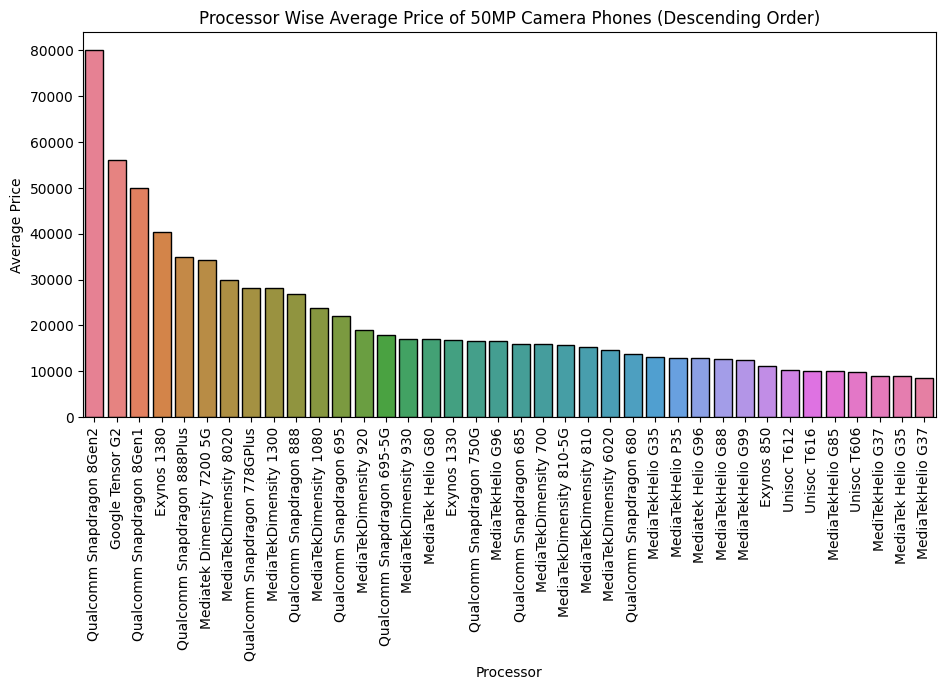

In [200]:
# Processor wise price of 50MP camera phone of each processor in decreasing order with visualization

# Group the filtered DataFrame by 'Processor' and calculate the mean price for each processor
processor_avg_price_50mp = df_50mp.groupby(['Processor'])['Price'].mean().sort_values(ascending=False)

# Print the average price for each processor with a 50 MP rear camera
#print("List of 50 MP Rear Camera Phone", processor_avg_price_50mp)

# Visualization
plt.figure(figsize=(11, 5))
sns.barplot(x=processor_avg_price_50mp.index, y=processor_avg_price_50mp.values,palette='husl',edgecolor='black')
plt.xlabel("Processor")
plt.ylabel("Average Price")
plt.title("Processor Wise Average Price of 50MP Camera Phones (Descending Order)")
plt.xticks(rotation=90)
plt.show()


In [201]:
# Observations of above Processor wise price of 50MP camera phone of each processor in decreasing order with visualization

print("Observations based on Processor Wise Average Price of 50MP Camera Phones:")
print("-" * 60)

print("Based on the visualization, it's evident that certain processors tend to be associated with higher average prices for phones featuring a 50MP rear camera.")
print("This suggests a correlation between processor performance or features and the overall cost of the device.")

print("\nKey Observations:")
print("1.  **Qualcomm Snapdragon 8Gen2** appears to be at the top end of the price range among processors for 50MP camera phones. This signifies that it's potentially a high-performance processor that is incorporated into premium devices with advanced features.")
print("2.  **Google Tensor G2** also holds a high average price point, indicating that it's likely a powerful processor for this camera configuration.")
print("3.  **Other processors like Snapdragon 8Gen1, Exynos 1380, and Dimensity 7200** demonstrate a similar trend.")
print("4.  **Processors lower down on the list** might represent more budget-friendly or less powerful options.")



Observations based on Processor Wise Average Price of 50MP Camera Phones:
------------------------------------------------------------
Based on the visualization, it's evident that certain processors tend to be associated with higher average prices for phones featuring a 50MP rear camera.
This suggests a correlation between processor performance or features and the overall cost of the device.

Key Observations:
1.  **Qualcomm Snapdragon 8Gen2** appears to be at the top end of the price range among processors for 50MP camera phones. This signifies that it's potentially a high-performance processor that is incorporated into premium devices with advanced features.
2.  **Google Tensor G2** also holds a high average price point, indicating that it's likely a powerful processor for this camera configuration.
3.  **Other processors like Snapdragon 8Gen1, Exynos 1380, and Dimensity 7200** demonstrate a similar trend.
4.  **Processors lower down on the list** might represent more budget-friendl

#### Companies value counts and Top 5 Companies with Most Mobile Models

In [202]:
df['Company'].value_counts()

,count
Company,
realme,97
REDMI,71
Infinix,65
vivo,60
POCO,58
SAMSUNG,53
MOTOROLA,45
OPPO,16
Tecno,16


Insights from Company Value Counts:
------------------------------
Total number of unique companies: 19
Top 5 most frequent companies:
Company
realme     97
REDMI      71
Infinix    65
vivo       60
POCO       58
Name: count, dtype: int64
------------------------------
Companies with less than 5 mobile models:
Company
Nokia       3
itel        3
IQOO        2
Micromax    2
I           2
nothing     2
LAVA        1
Name: count, dtype: int64
------------------------------
Percentage of models from the top 3 companies:
45.24%
------------------------------


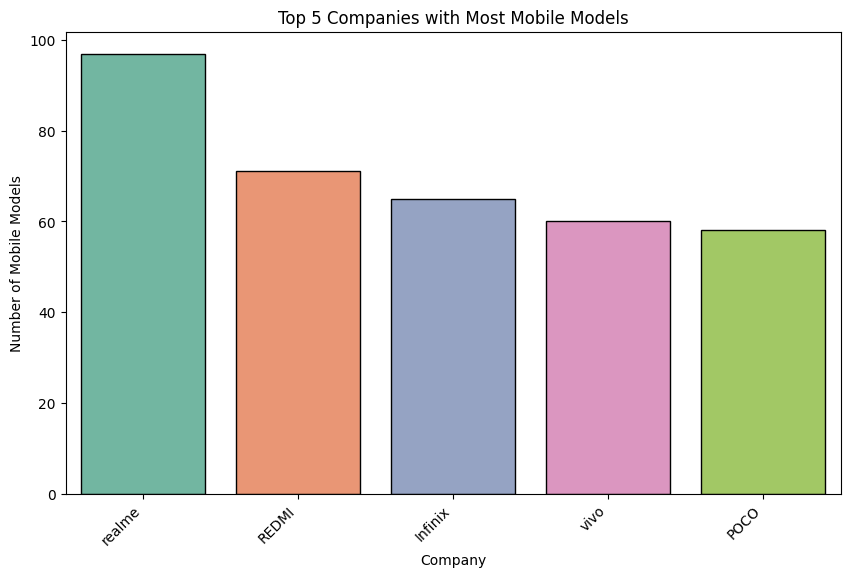

In [203]:
# Company value counts

# Get the value counts of the 'Company' column
company_counts = df['Company'].value_counts()

# Print the insights
print("Insights from Company Value Counts:")
print("-" * 30)
print("Total number of unique companies:", len(company_counts))
print("Top 5 most frequent companies:")
print(company_counts.head(5))
print("-" * 30)
print("Companies with less than 5 mobile models:")
print(company_counts[company_counts < 5])
print("-" * 30)

# Additional insights (optional)
print("Percentage of models from the top 3 companies:")
top_3_percentage = (company_counts.head(3).sum() / company_counts.sum()) * 100
print(f"{top_3_percentage:.2f}%")
print("-" * 30)


# Visualize the top 5 most frequent companies using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=company_counts.head(5).index, y=company_counts.head(5).values, palette='Set2',edgecolor='black')
plt.xlabel("Company")
plt.ylabel("Number of Mobile Models")
plt.title("Top 5 Companies with Most Mobile Models")
plt.xticks(rotation=45, ha='right')
plt.show()

In [204]:
# Observation for above Top 5 Companies with Most Mobile Models visualization

print("Recommendation based on Top 5 Companies with Most Mobile Models:")
print("-" * 60)

print("\nKey Observations:")
print("1. **realme** has a significantly larger number of models in the dataset, highlighting its dominance in midrange phone and extensive product range.")
print("2. **REDMI** holds the second position, suggesting a substantial presence in the market with a diverse portfolio of phone models.")


Recommendation based on Top 5 Companies with Most Mobile Models:
------------------------------------------------------------

Key Observations:
1. **realme** has a significantly larger number of models in the dataset, highlighting its dominance in midrange phone and extensive product range.
2. **REDMI** holds the second position, suggesting a substantial presence in the market with a diverse portfolio of phone models.


#### Top 3 company's percentage

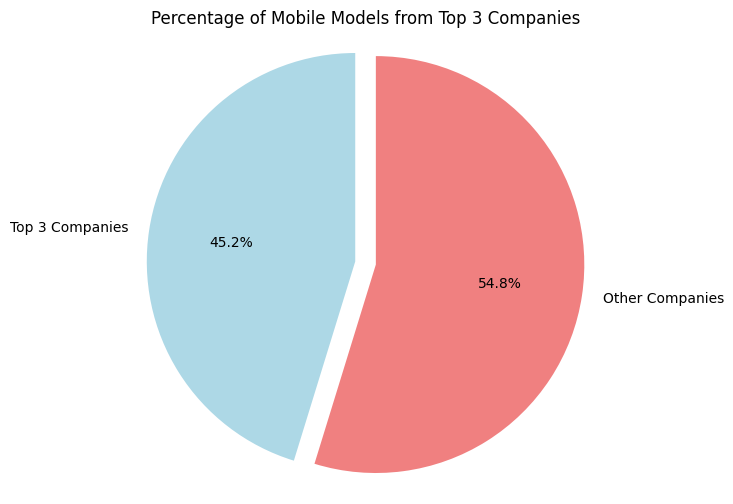

In [205]:
# visualization the top_3_percentage of top 3 mobile phone

import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Top 3 Companies', 'Other Companies']
sizes = [top_3_percentage, 100 - top_3_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the 'Top 3 Companies' slice

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Mobile Models from Top 3 Companies')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()


#### Model Diversity Across Companies

In [206]:
# Count of Mobile with Compnay and Model vise
pd.set_option('display.max_rows', None)
df.groupby(['Company'])['ModelName'].value_counts()

Company   ModelName             
APPLE     iPhone 14Plus             3
          iPhone 11                 1
          iPhone 12                 1
Google    Pixel 6a                  3
          Pixel 7                   3
          Pixel 7a                  3
I         Kall Z19Pro               1
          Kall Z19Pro Flash blue    1
IQOO      Neo 7 5G                  2
Infinix   HOT 30i                   8
          Hot 12Pro                 5
          HOT 20Play                4
          Hot 12                    4
          Smart 6                   4
          Smart 7HD                 4
          HOT 20 5G                 3
          NOTE 12i                  3
          SMART 7                   3
          Smart 6HD                 3
          Zero 5G                   3
          Zero 5G 2023 TURBO        3
          HOT 12 Play               2
          Hot 11                    2
          Hot 20 5G                 2
          Note 12                   2
          Note 12 5G                2
          Note 12Pro                2
          Note 12Pro 5G             2
          Zero 20                   2
          Note 11s                  1
          Smart 5A                  1
LAVA      Z2                        1
MOTOROLA  e13                       5
          G32                       4
          G62 5G                    4
          Edge 40                   3
          g13                       3
          g42                       3
          g52                       3
          Edge 30                   2
          Edge 30 Fusion            2
          Edge 30 Ultra             2
          e32                       2
          g31                       2
          g72                       2
          g73 5G                    2
          g82 5G                    2
          G42                       1
          e22s                      1
          e40                       1
          g22                       1
Micromax  IN 2C                     2
Nokia     C01 Plus                  2
          G11 Plus                  1
OPPO      A17                       4
          A17k                      3
          A77s                      2
          Reno8T 5G                 2
          A17K                      1
          A77                       1
          A78 5G                    1
          F21 Pro                   1
          F21s Pro                  1
OnePlus   8                         2
          Nord 2T 5G                2
          Nord                      1
POCO      F5 5G                     6
          M5                        6
          X5 Pro 5G                 6
          C50                       5
          C55                       5
          M4 5G                     5
          X5 5G                     5
          M4 Pro                    4
          M4 Pro 5G                 4
          X4 Pro 5G                 4
          C31                       3
          C51                       2
          F1                        1
          M3 Pro 5G                 1
          X2                        1
REDMI     Note 12Pro 5G             9
          10                        8
          11 Prime                  6
          A1Plus                    6
          K50i 5G                   6
          Note 12                   6
          Note 12 5G                6
          Note 12ProPlus 5G\t       6
          Note 11T 5G               3
          10A SPORT                 2
          9 Activ                   2
          9A Sport                  2
          10 Prime                  1
          12c                       1
          9i                        1
          Note 10 Lite              1
          Note 10S                  1
          Note 11                   1
          Note 11S                  1
          Note 9                    1
          max                       1
SAMSUNG   Galaxy A14 5G             9
          Galaxy F13                6
          Galax

Insights from Company and ModelName Value Counts:
--------------------------------------------------
Total number of unique Company-Model combinations: 178

Top 5 most frequent Company-Model combinations:
Company  ModelName    
APPLE    iPhone 14Plus    3
         iPhone 11        1
         iPhone 12        1
Google   Pixel 6a         3
         Pixel 7          3
Name: count, dtype: int64

Companies with the highest model diversity (most unique ModelNames):
Company
realme      32
Infinix     22
REDMI       21
MOTOROLA    19
vivo        18
Name: ModelName, dtype: int64

Models with the highest frequency across all companies:
Company  ModelName    
realme   C55              9
SAMSUNG  Galaxy A14 5G    9
REDMI    Note 12Pro 5G    9
vivo     Y16              9
REDMI    10               8
Name: count, dtype: int64

Companies with only one unique Model:
Company
Micromax    1
LAVA        1
IQOO        1
itel        1
nothing     1
Name: ModelName, dtype: int64
------------------------------

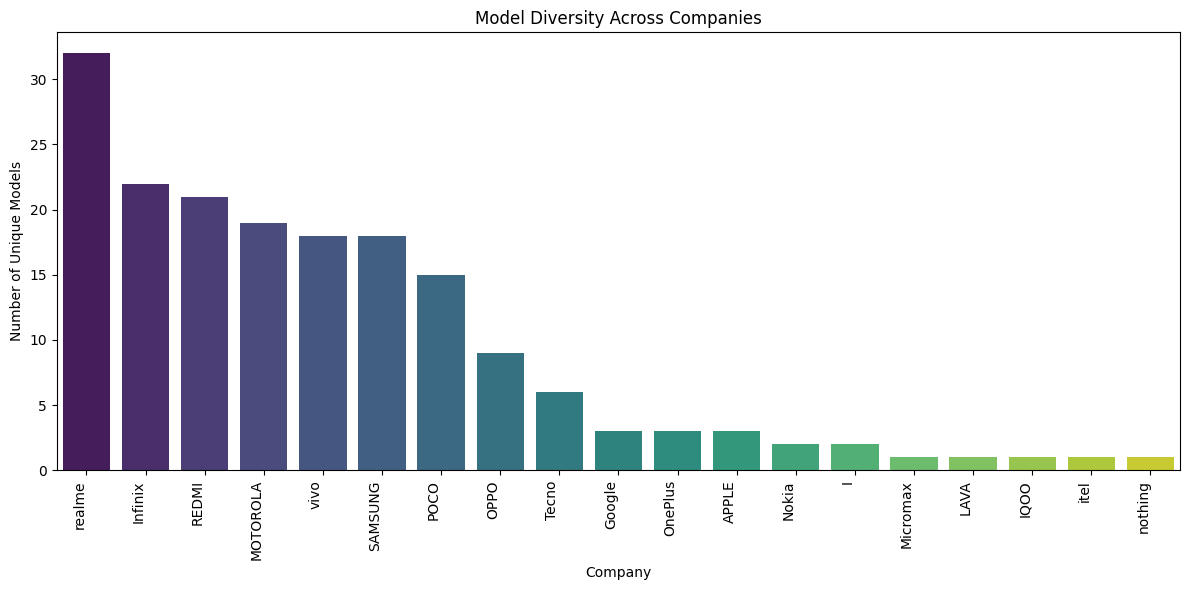

In [207]:
# Insights of above code

# Group the DataFrame by 'Company' and then count the occurrences of each 'ModelName' within each company.
company_model_counts = df.groupby(['Company'])['ModelName'].value_counts()

# Print insights about the company and model counts
print("Insights from Company and ModelName Value Counts:")
print("-" * 50)

# Total Number of Unique Combinations
print(f"Total number of unique Company-Model combinations: {len(company_model_counts)}")

# Top 5 Most Frequent Combinations
print("\nTop 5 most frequent Company-Model combinations:")
print(company_model_counts.head(5))

# Companies with the Highest Model Diversity
print("\nCompanies with the highest model diversity (most unique ModelNames):")
model_diversity = df.groupby('Company')['ModelName'].nunique().sort_values(ascending=False)
print(model_diversity.head(5))


# Models with Highest Frequency Across Companies
print("\nModels with the highest frequency across all companies:")
print(company_model_counts.sort_values(ascending=False).head(5))

# Companies with Only One Model
print("\nCompanies with only one unique Model:")
print(model_diversity[model_diversity == 1])

print("-" * 50)

print("\n")



# Visualize the model diversity with different colors
plt.figure(figsize=(12, 6))
sns.barplot(x=model_diversity.index, y=model_diversity.values, palette='viridis')  # Use 'viridis' palette for a gradient color scheme
plt.xlabel("Company")
plt.ylabel("Number of Unique Models")
plt.title("Model Diversity Across Companies")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


#### Average Price of Mobiles with 50 MP Rear Camera by Company and visualization

Company
Google      49749.000000
nothing     29999.000000
OnePlus     28087.500000
SAMSUNG     20315.150000
vivo        18462.827586
MOTOROLA    16733.705882
REDMI       16197.657143
realme      14159.200000
OPPO        14066.285714
POCO        12511.500000
Infinix     11641.857143
Tecno        9812.000000
Nokia        9790.000000
Name: Price, dtype: float64




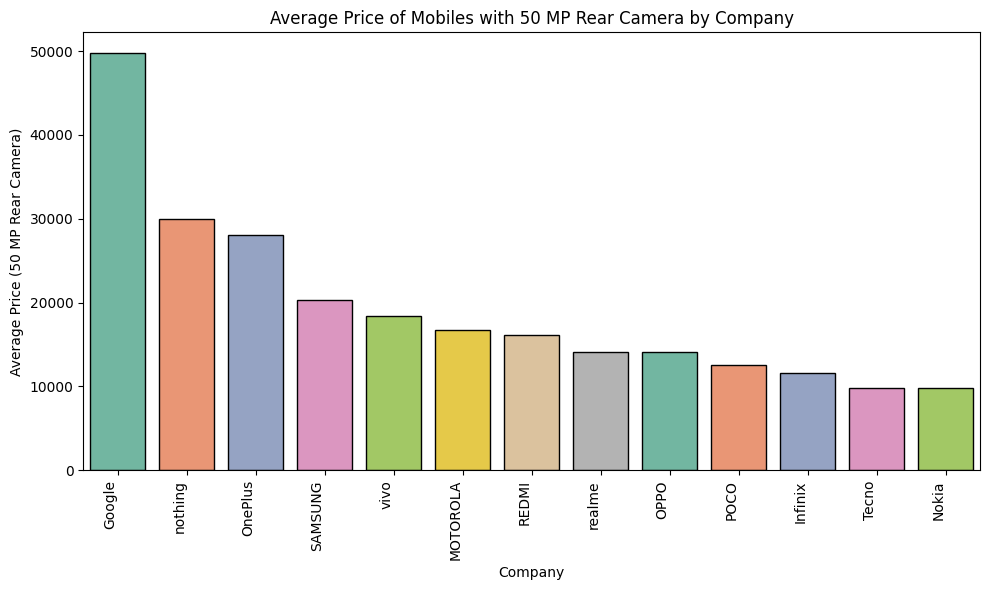

In [208]:
# compare 50 mp rearcamera of every compnay with price

# Filter the DataFrame to include only rows where 'RearCameraMP' is 50
df_50mp = df[df['RearCameraMP'] == 50]

# Group the filtered DataFrame by 'Company' and calculate the mean price for each company
company_avg_price_50mp = df_50mp.groupby('Company')['Price'].mean().sort_values(ascending=False)

# Print the average price for each company with a 50 MP rear camera
print(company_avg_price_50mp)
print("\n")



# Visualize the average price for each company with a 50 MP rear camera using a bar plot with different colors
plt.figure(figsize=(10, 6))
sns.barplot(x=company_avg_price_50mp.index, y=company_avg_price_50mp.values, palette='Set2',edgecolor='black')  # Use 'Set2' palette for a distinct color scheme
plt.xlabel("Company")
plt.ylabel("Average Price (50 MP Rear Camera)")
plt.title("Average Price of Mobiles with 50 MP Rear Camera by Company")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


In [209]:
# Recommendation and insights of Average Price of Mobiles with 50 MP Rear Camera by Company

print("Recommendation and Insights of Average Price of Mobiles with 50 MP Rear Camera by Company:")
print("-" * 60)

print("\nKey Observations:")
print("1.  **Companies like Google, Nothing, and OnePlus** demonstrate higher average prices for 50MP rear camera phones.")
print("2.  **Companies like vivo, SAMSUNG, MOTOROLA** have moderately priced options for 50MP camera devices.")
print("3.  **Some brands like realme, OPPO, POCO** fall in a lower price bracket for models with 50MP rear cameras, potentially indicating more budget-friendly options.")


Recommendation and Insights of Average Price of Mobiles with 50 MP Rear Camera by Company:
------------------------------------------------------------

Key Observations:
1.  **Companies like Google, Nothing, and OnePlus** demonstrate higher average prices for 50MP rear camera phones.
2.  **Companies like vivo, SAMSUNG, MOTOROLA** have moderately priced options for 50MP camera devices.
3.  **Some brands like realme, OPPO, POCO** fall in a lower price bracket for models with 50MP rear cameras, potentially indicating more budget-friendly options.


#### Average Price of Mobiles with 50 MP Rear Camera by Company with visualisation

Company
APPLE      67639.0
SAMSUNG    38999.0
Google     28999.0
POCO       13489.0
Name: Price, dtype: float64




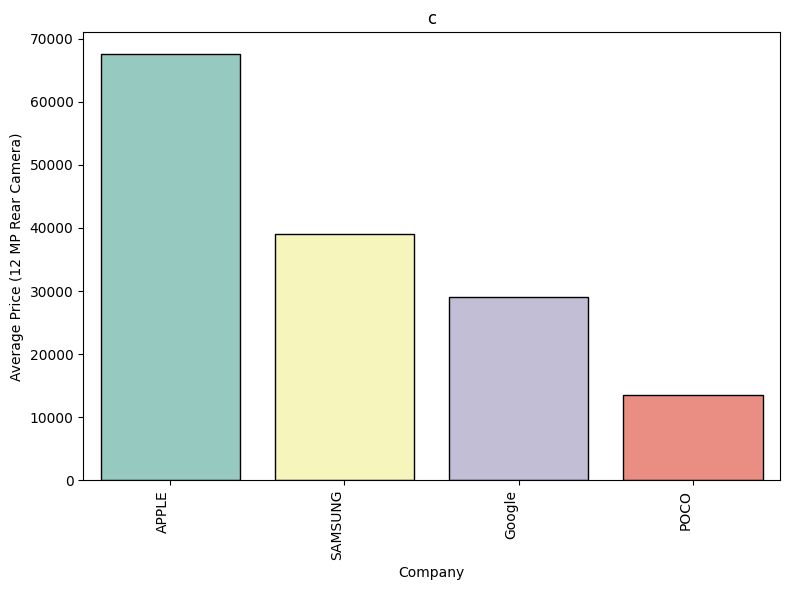

In [210]:
# compare 12 mp rearcamera of every compnay with price

# Filter the DataFrame to include only rows where 'RearCameraMP' is 12
df_12mp = df[df['RearCameraMP'] == 12]

# Group the filtered DataFrame by 'Company' and calculate the mean price for each company
company_avg_price_12mp = df_12mp.groupby('Company')['Price'].mean().sort_values(ascending=False)

# Print the average price for each company with a 12 MP rear camera
print(company_avg_price_12mp)
print("\n")



# Visualize the average price for each company with a 12 MP rear camera using a bar plot with different colors
plt.figure(figsize=(8, 6))
sns.barplot(x=company_avg_price_12mp.index, y=company_avg_price_12mp.values, palette='Set3',edgecolor='black')  # Use 'Set3' palette for a distinct color scheme
plt.xlabel("Company")
plt.ylabel("Average Price (12 MP Rear Camera)")
plt.title("c")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


#### Correlations between key features and Price

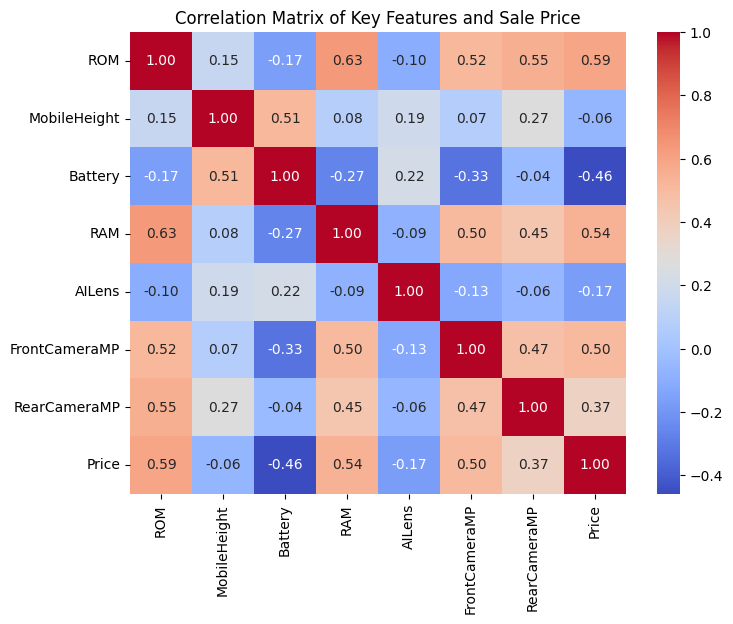

In [211]:
# Calculate correlations between key features and Price
correlations_key_features = df[['ROM', 'MobileHeight', 'Battery', 'RAM','AILens','FrontCameraMP','RearCameraMP','Price']].corr()

# Print the correlation matrix
#print(correlations_key_features)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations_key_features, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features and Sale Price')
plt.show()

#### Distributions of numeric features

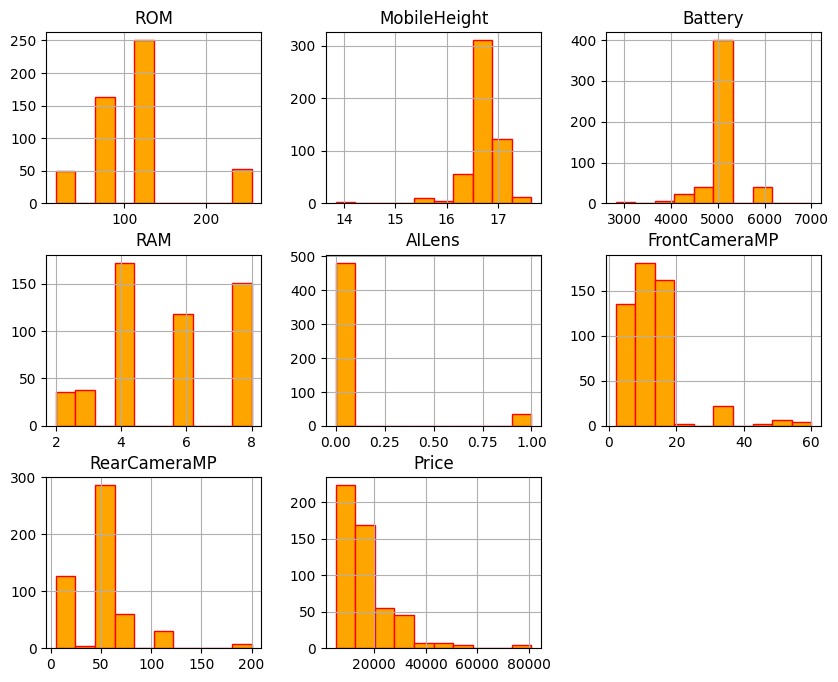

In [212]:
# Check the distribution of numerical features
df[['ROM', 'MobileHeight', 'Battery', 'RAM', 'AILens', 'FrontCameraMP', 'RearCameraMP', 'Price']].hist(figsize=(10, 8),edgecolor='red', color='orange')
plt.show()


In [213]:
# Interpretation

# Based on the histograms generated, we can observe the following:

# ROM: Most phones have a ROM between 64 and 128 GB.
# MobileHeight: The distribution of phone heights appears somewhat normal, likely concentrated around a common size, i.e in between 16 to 17 inch
# Battery: The battery size distribution is right-skewed, suggesting a majority of phones have a 5000 mah battery.
# RAM: Most phones fall within the range of 4 to 8 GB of RAM, with a few options beyond that.
# AILens: This feature seems to be concentrated towards either 0 or a particular small range, likely representing a binary presence or absence of AILens.
# FrontCameraMP: The front camera megapixel count is concentrated towards lower numbers, mostly within 16 MP.
# RearCameraMP: Most phones have a rear camera with a megapixel count up to 50 MP, with a few having more, resulting in a right-skewed distribution.
# Price: The price distribution is right-skewed, indicating that most phones have a lower price point and some phones have a much higher price.

# In summary, we can glean insights into the typical ranges and distributions of various phone features from the histograms.
# For instance, it's evident that the market has a bias towards devices with a ROM of 64-128 GB and RAM of 4-8 GB,
# and the price range is skewed towards lower-end devices. The battery and rear camera megapixel counts also show a tendency towards having a larger range of values within the dataset,
# with a few phones on the higher end of each of those ranges.


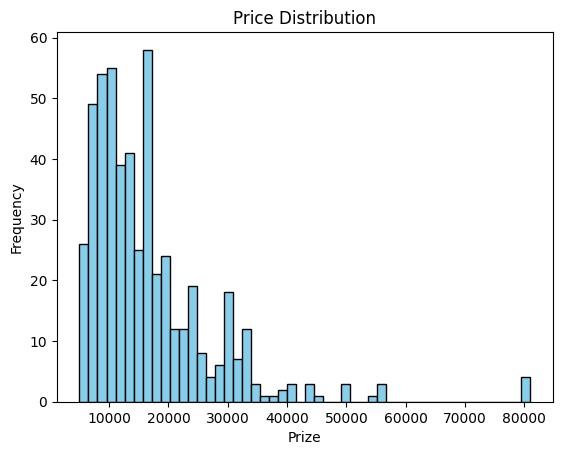

In [214]:
# check only prize distribution
plt.hist(df['Price'],bins=50, color='skyblue',edgecolor='black')
plt.xlabel('Prize')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [215]:

# interpretation

# The price distribution plot reveals that the majority of phone prices are concentrated towards the lower end of the spectrum, with a long tail extending towards higher prices
# This indicates a right-skewed distribution, which means there are more phones with lower prices and fewer phones with higher prices.
# Possible reasons for this could be that there are more budget-friendly phones available in the market compared to higher-end, premium models.
# Additionally, there might be some outliers on the higher end of the price range, representing luxury or flagship models that are significantly more expensive.



#### multivariate analysis of categorical columns with prize


In [216]:
# multivariate analysis of categorical columns with prize

# Grouping the data by categorical columns and calculate their mean prize
categorical_columns = ['Company', 'Processor', 'ROM', 'RAM', 'AILens']
for column in categorical_columns:
  print(f"Multivariate analysis for {column}:")
  print(df.groupby(column)['Price'].mean().sort_values(ascending=False))
  print("\n")


Multivariate analysis for Company:
Company
APPLE       67639.000000
Google      43221.222222
IQOO        32536.500000
nothing     29999.000000
OnePlus     29976.800000
SAMSUNG     21031.150943
vivo        19793.900000
MOTOROLA    16797.244444
REDMI       16573.887324
OPPO        16119.875000
POCO        15725.551724
realme      13544.030928
Infinix     10620.538462
Tecno        8598.875000
LAVA         7999.000000
I            7999.000000
Nokia        7296.000000
Micromax     5999.000000
itel         5996.000000
Name: Price, dtype: float64


Multivariate analysis for Processor:
Processor
Qualcomm Snapdragon 8Gen2        79999.000000
ios                              67639.000000
Google Tensor G2                 55999.000000
Qualcomm Snapdragon 8Gen1        49999.000000
Qualcomm Snapdragon 8PlusGen1    49999.000000
Tensor G2                        43999.000000
Exynos 1380                      40332.333333
Qualcomm Snapdragon 888Plus      34999.000000
MediaTekDimensity 8200           3468

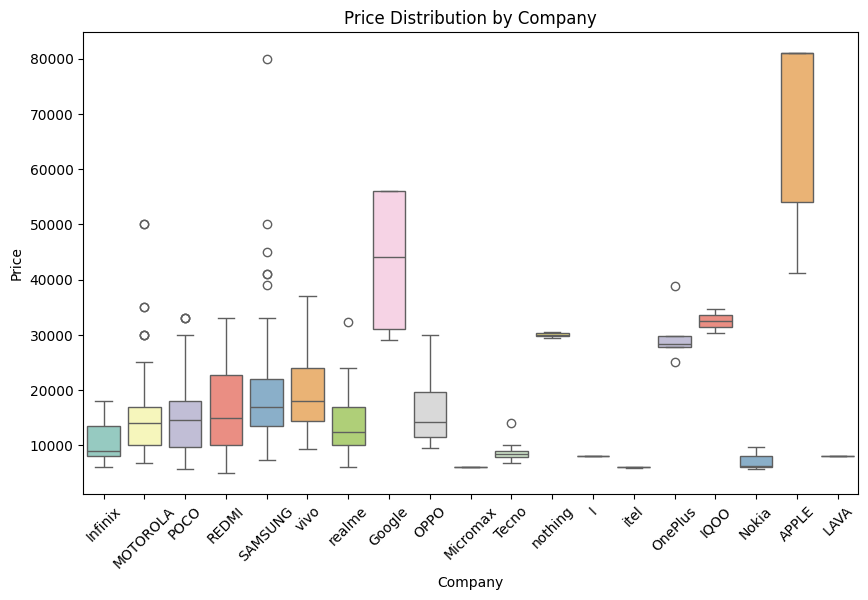

In [217]:
# visualisation with boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Price',  data=df,palette='Set3')
plt.title('Price Distribution by Company')
plt.xticks(rotation=45)
plt.show()

In [218]:
# Observations of above Price Distribution by Company box plot

print("Insights from Price Distribution by Company Box Plot:")
print("-" * 60)

print("The box plot provides a visual comparison of the price distribution across different mobile phone companies.")
print("Key takeaways include:")

print("1. **Interquartile Range (IQR):** The IQR represents the range within which the middle 50% of phone prices for each company lie.  Companies with larger IQRs suggest a wider variety of prices for their models, indicating a greater diversity in their product offerings.")
print("2. **Median Price:** The line within each box represents the median price for each company's models. It gives us an idea of the central tendency of prices for each company. The median helps compare the typical price point of phones across different manufacturers.")
print("3. **Outliers:** The individual points beyond the whiskers represent outliers, i.e., phones with exceptionally high or low prices within each company's model range. These can potentially highlight premium or budget models.")
print("4. **Company-wise Price Comparison:** By looking at the overall position and spread of the boxes, we can quickly compare the price ranges of different brands.  For instance, if a box is located significantly higher than others and has a broader range, it suggests that the company tends to offer a more expensive range of models.")

print("\nExamples of insights that can be drawn:")

print(" - APPLE typically has a higher median price and a larger IQR, implying a wider range of prices for their devices.")
print(" - SAMSUNG also has a relatively higher median price and a considerable IQR, although not as high as APPLE.")
print(" - Companies like vivo, OPPO, REDMI, and realme offer models across a lower price range.")
print(" - Some brands with narrow boxes and outliers, like Infinix and Motorola, offer budget-friendly options along with some high-end models.")


Insights from Price Distribution by Company Box Plot:
------------------------------------------------------------
The box plot provides a visual comparison of the price distribution across different mobile phone companies.
Key takeaways include:
1. **Interquartile Range (IQR):** The IQR represents the range within which the middle 50% of phone prices for each company lie.  Companies with larger IQRs suggest a wider variety of prices for their models, indicating a greater diversity in their product offerings.
2. **Median Price:** The line within each box represents the median price for each company's models. It gives us an idea of the central tendency of prices for each company. The median helps compare the typical price point of phones across different manufacturers.
3. **Outliers:** The individual points beyond the whiskers represent outliers, i.e., phones with exceptionally high or low prices within each company's model range. These can potentially highlight premium or budget models

#### VISUALIZE THE BAR CHART OF MEDIATEK PROCESSOR WITH PRIZE

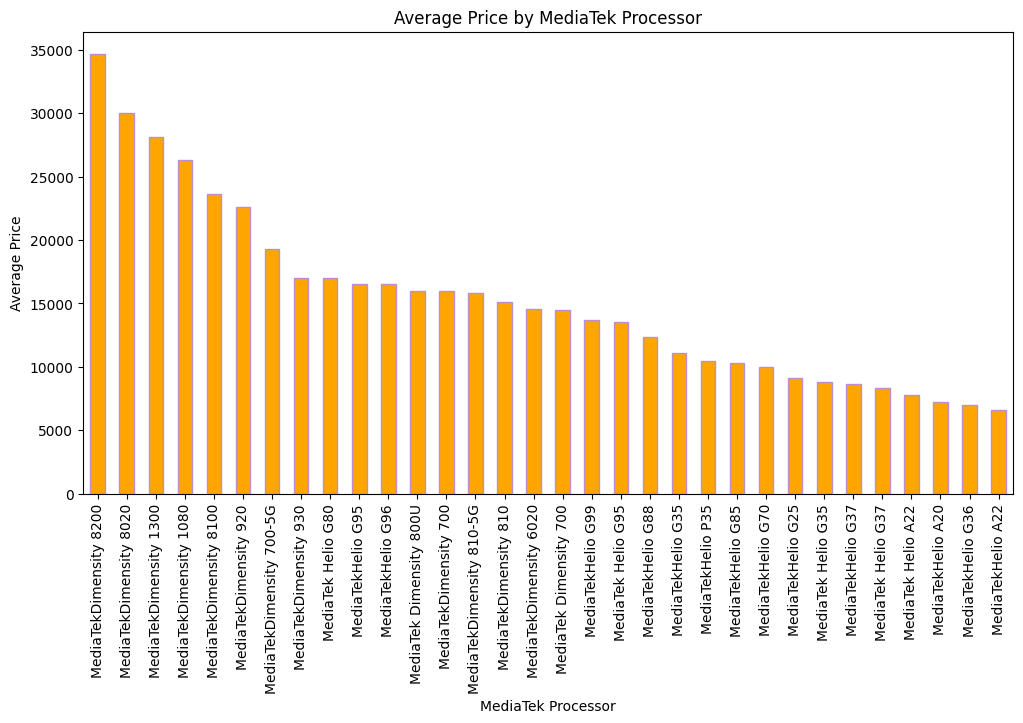

In [219]:
# VISUALIZE THE BAR CHART OF MEDIATEK PROCESSOR WITH PRIZE

# Filter the DataFrame to include only rows with 'MediaTek' processors
mediatek_df = df[df['Processor'].str.contains('MediaTek')]

# Group the filtered DataFrame by processor and calculate the mean prize
mediatek_processor_prize = mediatek_df.groupby('Processor')['Price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
mediatek_processor_prize.plot(kind='bar',color='orange', edgecolor='#BB8FCE')
plt.xlabel('MediaTek Processor')
plt.ylabel('Average Price')
plt.title('Average Price by MediaTek Processor')
#plt.xticks(rotation=45)
plt.show()


In [220]:
# insights of Average Price by MediaTek Processor

print("Insights from Average Price by MediaTek Processor:")
print("-" * 50)

print("The bar chart illustrates the average price associated with different MediaTek processors. Here's what we can glean:")

print("\nKey Observations:")
print("1.  **Dimensity 8200, 8020, 1300. 1080 processors** exhibit a higher average price, suggesting they are incorporated into more premium devices.")
print("2.  **Dimensity 8100, 920, 700** have a relatively moderate average price.")
print("3.  **Processors like Helio A22, G36, A20, G37** are positioned at the lower end of the price spectrum.")

print("\nRecommendation for Consumers:")
print("Consumers seeking high-performance MediaTek devices might consider phones with **Dimensity 8200, 8020, 1300. 1080 processors**, while users on a tighter budget could explore options with **Dimensity 8100, 920, 700**")

print("-" * 50)


Insights from Average Price by MediaTek Processor:
--------------------------------------------------
The bar chart illustrates the average price associated with different MediaTek processors. Here's what we can glean:

Key Observations:
1.  **Dimensity 8200, 8020, 1300. 1080 processors** exhibit a higher average price, suggesting they are incorporated into more premium devices.
2.  **Dimensity 8100, 920, 700** have a relatively moderate average price.
3.  **Processors like Helio A22, G36, A20, G37** are positioned at the lower end of the price spectrum.

Recommendation for Consumers:
Consumers seeking high-performance MediaTek devices might consider phones with **Dimensity 8200, 8020, 1300. 1080 processors**, while users on a tighter budget could explore options with **Dimensity 8100, 920, 700**
--------------------------------------------------


#### visualize bar chart of Unisoc processor with prize


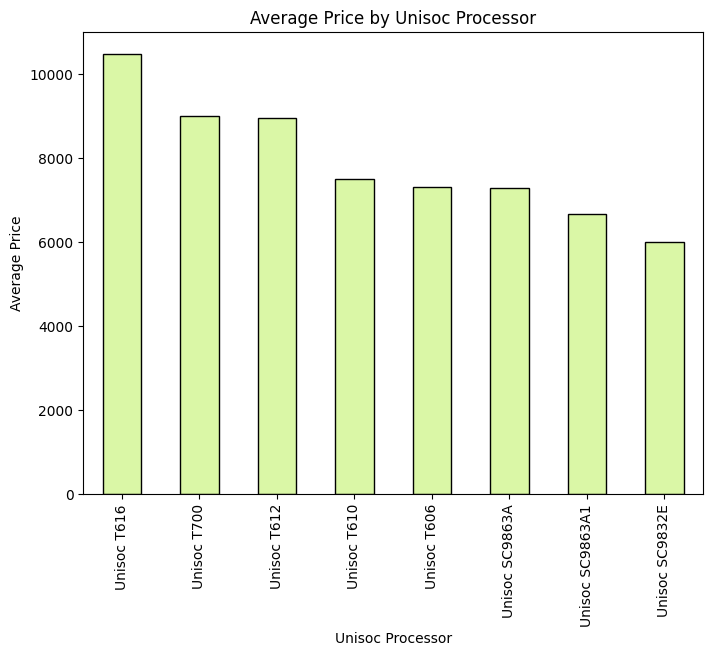

In [221]:
# visualize bar chart of Unisoc processor with prize


# Filter the DataFrame to include only rows with 'Unisoc' processors
unisoc_df = df[df['Processor'].str.contains('Unisoc')]

# Group the filtered DataFrame by processor and calculate the mean prize
unisoc_processor_prize = unisoc_df.groupby('Processor')['Price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(8, 6))
unisoc_processor_prize.plot(kind='bar',color='#DAF7A6',edgecolor='black')
plt.xlabel('Unisoc Processor')
plt.ylabel('Average Price')
plt.title('Average Price by Unisoc Processor')
#plt.xticks(rotation=45)
plt.show()


#### visualize the bar chart of Qualcomm processor with prize

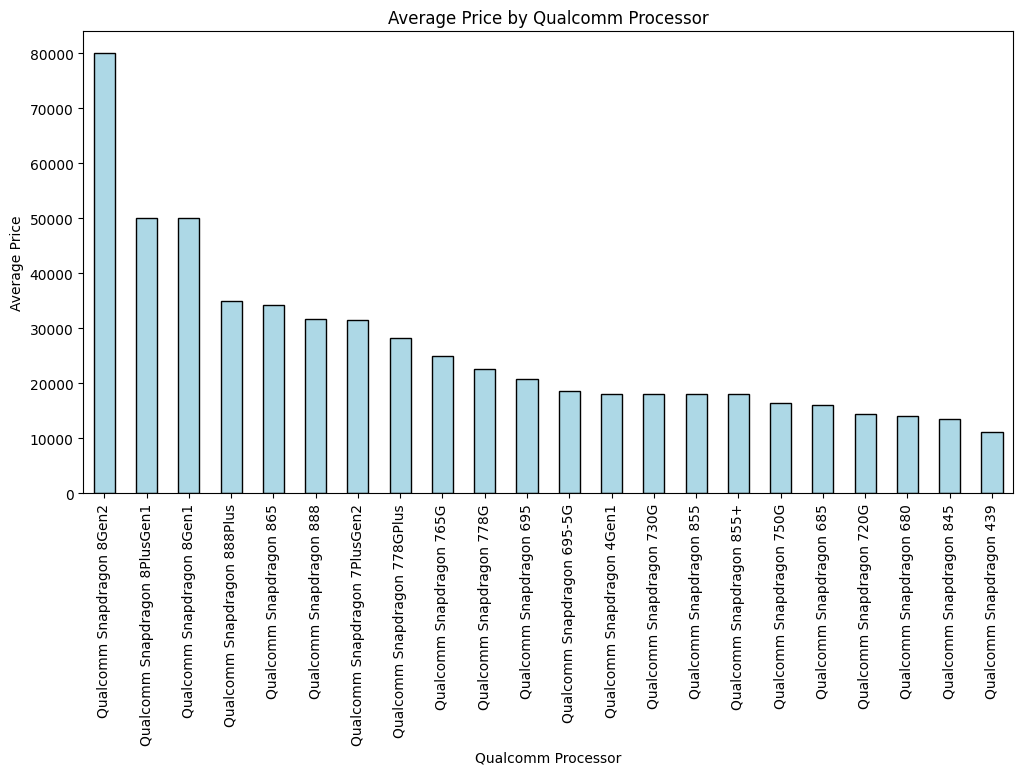

In [222]:
# visualize the bar chart of Qualcomm processor with prize


# Filter the DataFrame to include only rows with 'Qualcomm' processors
qualcomm_df = df[df['Processor'].str.contains('Qualcomm')]

# Group the filtered DataFrame by processor and calculate the mean prize
qualcomm_processor_prize = qualcomm_df.groupby('Processor')['Price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
qualcomm_processor_prize.plot(kind='bar',color='lightblue',edgecolor='black')
plt.xlabel('Qualcomm Processor')
plt.ylabel('Average Price')
plt.title('Average Price by Qualcomm Processor')
#plt.xticks(rotation=45)
plt.show()


In [223]:
# insights and recommendation of Average Price by Qualcomm Processor

print("Insights from Average Price by Qualcomm Processor:")
print("-" * 50)

print("The bar chart illustrates the average price associated with different Qualcomm processors. Here's what we can glean:")

print("\nKey Observations for Qalcomm Snapdragon Processor:")
print("1.  **Snapdragon 8 Gen 2, 8+ Gen 1, 8 Gen 1** exhibit a higher average price, suggesting they are incorporated into more premium devices.")
print("2.  **Snapdragon 888Plus, 865, 888, 7+Gen2** have a relatively moderate average price.")
print("3.  **Processors like Snapdragon 439, 720G, 680, 685, 750G** are positioned at the lower end of the price spectrum.")

print("-" * 50)


Insights from Average Price by Qualcomm Processor:
--------------------------------------------------
The bar chart illustrates the average price associated with different Qualcomm processors. Here's what we can glean:

Key Observations for Qalcomm Snapdragon Processor:
1.  **Snapdragon 8 Gen 2, 8+ Gen 1, 8 Gen 1** exhibit a higher average price, suggesting they are incorporated into more premium devices.
2.  **Snapdragon 888Plus, 865, 888, 7+Gen2** have a relatively moderate average price.
3.  **Processors like Snapdragon 439, 720G, 680, 685, 750G** are positioned at the lower end of the price spectrum.
--------------------------------------------------


#### Visualization of Average Price by Compnay and Processor with Price

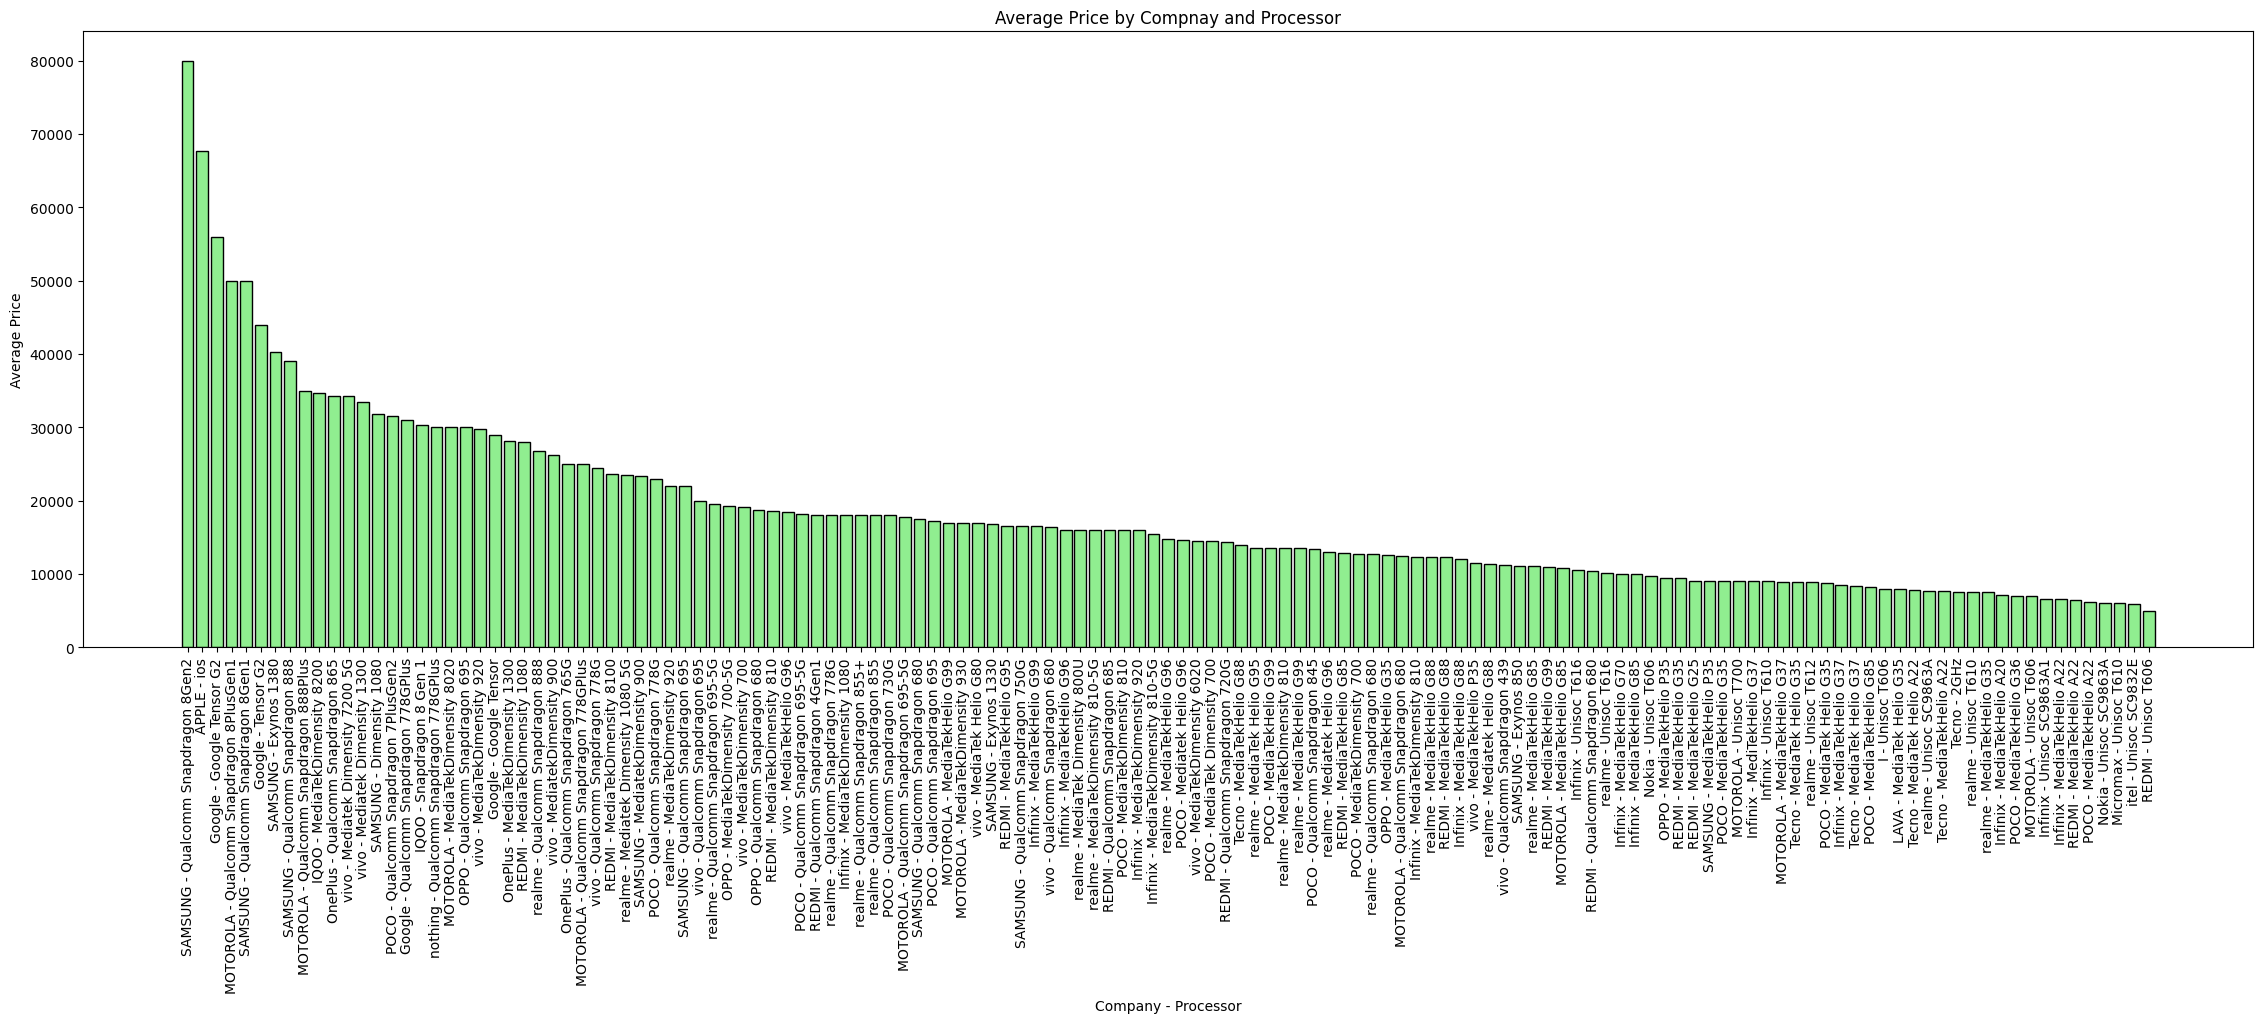

In [224]:
# Group the data by ModelName and Colour and calculate the mean Price
grouped_data = df.groupby(['Company', 'Processor'])['Price'].mean().sort_values(ascending=False)

# Convert the grouped data to a DataFrame for easier plotting
grouped_df = grouped_data.reset_index()

# Create a bar chart to visualize the mean price for each ModelName and Colour
plt.figure(figsize=(28, 8))
plt.bar(grouped_df['Company'] + ' - ' + grouped_df['Processor'], grouped_df['Price'], color="lightgreen",edgecolor='black')

plt.xlabel('Company - Processor')
plt.ylabel('Average Price')
plt.title('Average Price by Compnay and Processor')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


####  visualize ram v price bar plot


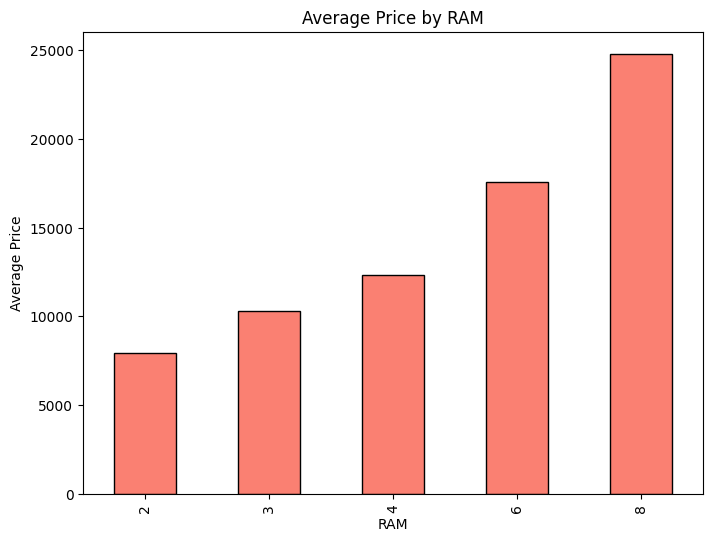

In [225]:
# visualize ram v price bar plot

plt.figure(figsize=(8, 6))
df.groupby('RAM')['Price'].mean().plot(kind='bar', color='salmon',edgecolor='black')
plt.xlabel('RAM')
plt.ylabel('Average Price')
plt.title('Average Price by RAM')
plt.show()


#### visualize the average price of model wich have AILens

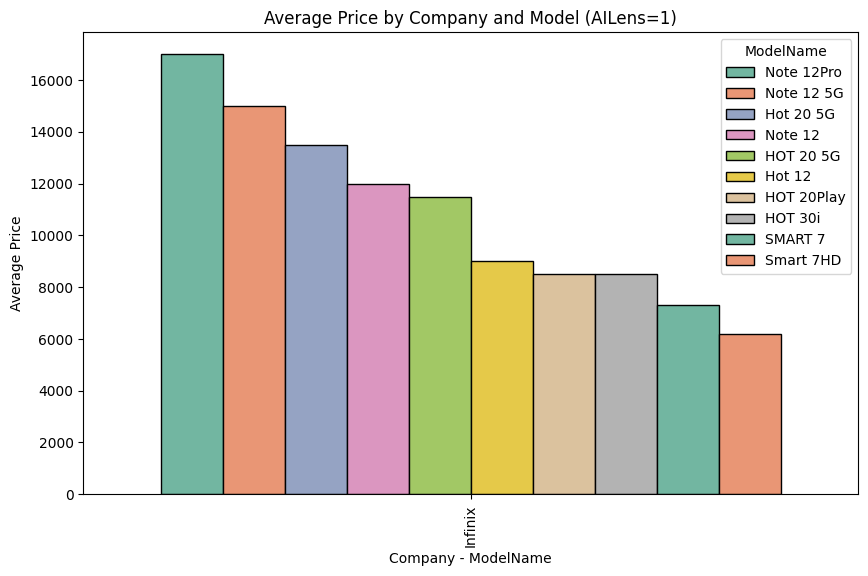

In [226]:
# visualize the average price of model wich have AILens

# Filtering the DataFrame to include only rows where AILens is 1
ailens_1_df = df[df['AILens'] == 1]

# Grouping the filtered DataFrame by Company and ModelName and calculate the mean Price
grouped_data = ailens_1_df.groupby(['Company', 'ModelName'])['Price'].mean().sort_values(ascending=False)

# Converting the grouped data to a DataFrame for easier plotting
grouped_df = grouped_data.reset_index()

# Creating a bar chart to visualize the mean price for each Company and ModelName
plt.figure(figsize=(10, 6))
#sns.barplot(grouped_df['Company'] + ' - ' + grouped_df['ModelName'], grouped_df['Price'],palette='Set2')
sns.barplot(x='Company', y='Price', hue='ModelName', data=grouped_df, palette='Set2',edgecolor='black')
plt.xlabel('Company - ModelName')
plt.ylabel('Average Price')
plt.title('Average Price by Company and Model (AILens=1)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


#### Visualization of Top 10 processor

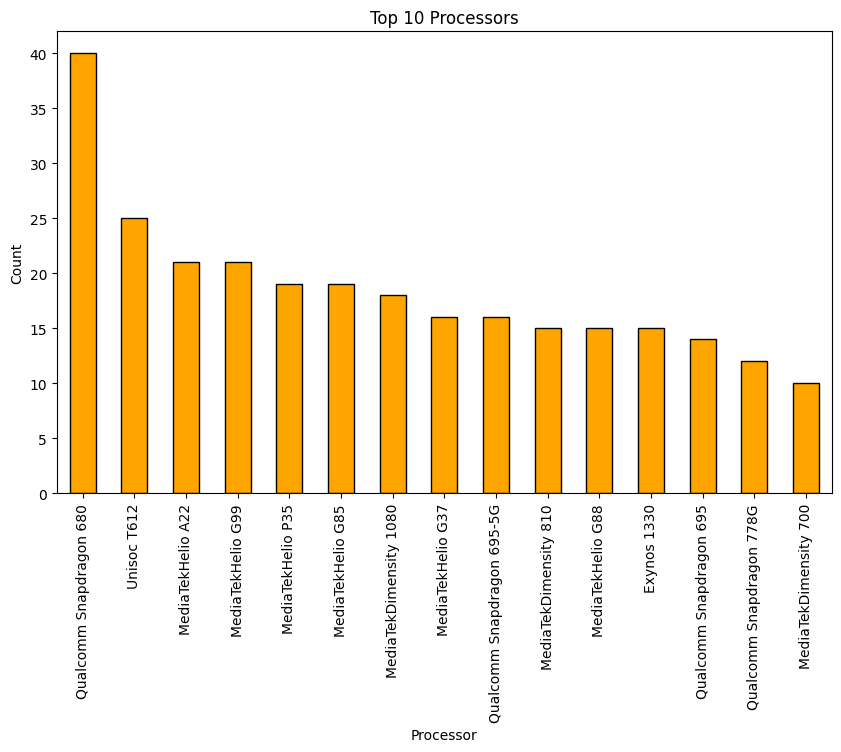

In [227]:
# Top 10 processor

top_10_processors = df['Processor'].value_counts().head(15).plot(kind='bar',color='orange',edgecolor='black', figsize=(10, 6))
plt.xlabel('Processor')
plt.ylabel('Count')
plt.title('Top 10 Processors')
plt.show()
#print(top_10_processors)


In [228]:
# Insights from Top 10 Processors

# Based on the bar chart showing the top 10 processors, we can gather several insights:

# 1. Market Dominance:
#   - Certain processors Snapdragon 680, Unisoc T612...clearly dominate the market, as indicated by their higher counts in the chart.
#   - These processors are likely widely used in various phone models and are favored by manufacturers.
#   - We can identify the most popular processors used in the phone market based on the chart.

# 2. Manufacturer Preferences:
#   - The prevalence of specific processors might reflect the preferences of different phone manufacturers.
#   - Some manufacturers might favor particular processors based on factors like performance, cost, or availability.

# 3. Cost-Effectiveness:
#   - Some processors might be popular due to their cost-effectiveness.
#   - This suggests that manufacturers are able to incorporate these processors into phones at competitive price points.

# 4. Target Market:
#   - The prevalence of certain processors might also be related to the target market for the phones.
#   - Budget-friendly phones may use more cost-effective processors, while premium phones may use higher-performance processors.

# In conclusion, analyzing the top 10 processors provides valuable information about the overall phone market, manufacturer preferences, and technological trends.
# By understanding which processors are most commonly used, we can draw inferences about the demand for certain features, the pricing strategies of manufacturers, and the overall direction of the phone industry.


#### Top 12 Mobile Phone Companies

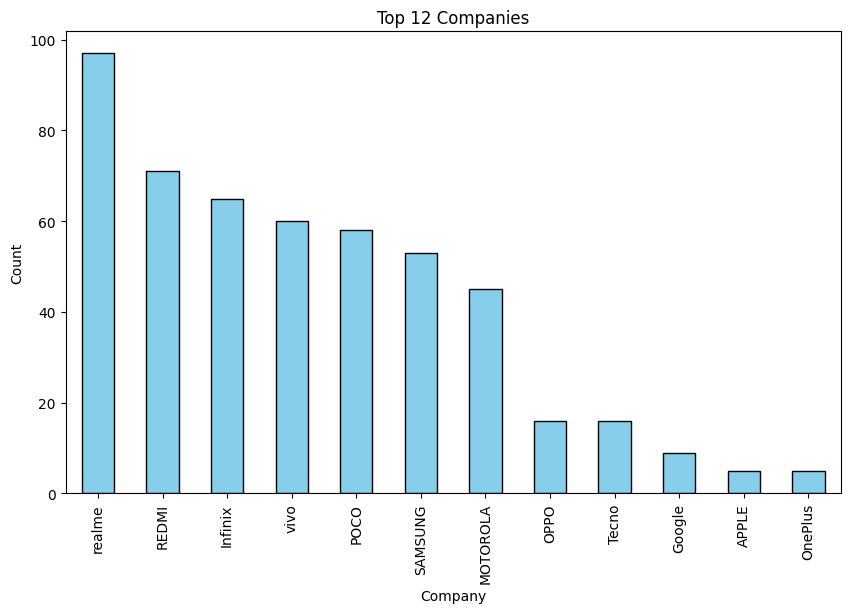

In [229]:
# Top 12 Companies
top_12_companies = df['Company'].value_counts().head(12)

plt.figure(figsize=(10, 6))
top_12_companies.plot(kind='bar',color='skyblue',edgecolor='black')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Top 12 Companies')
plt.show()


#### Ram count plot

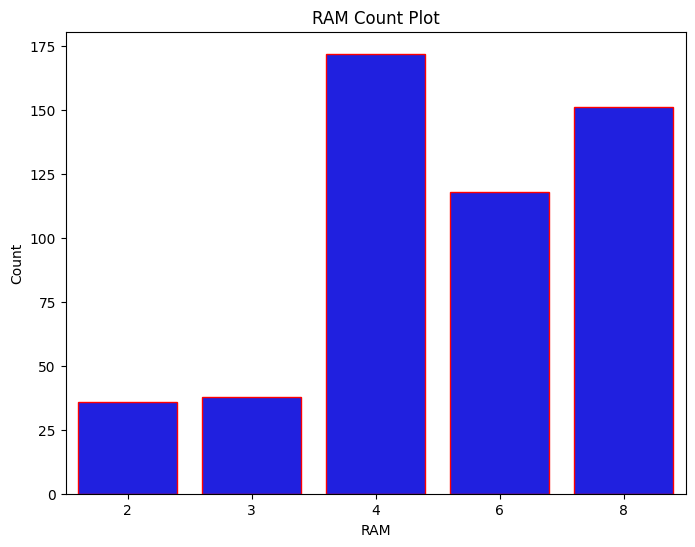

In [230]:
# Ram count plot

plt.figure(figsize=(8, 6))
sns.countplot(x='RAM',color='b', edgecolor='red', data=df)
plt.xlabel('RAM')
plt.ylabel('Count')
plt.title('RAM Count Plot')
plt.show()


#### Rom count plot

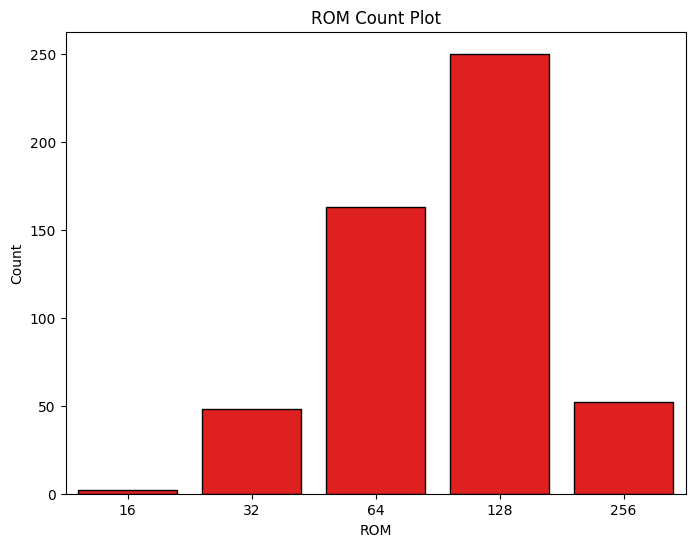

In [231]:
# Rom count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='ROM',color='r',edgecolor='black', data=df)
plt.xlabel('ROM')
plt.ylabel('Count')
plt.title('ROM Count Plot')
plt.show()


#### Front Camera count plot


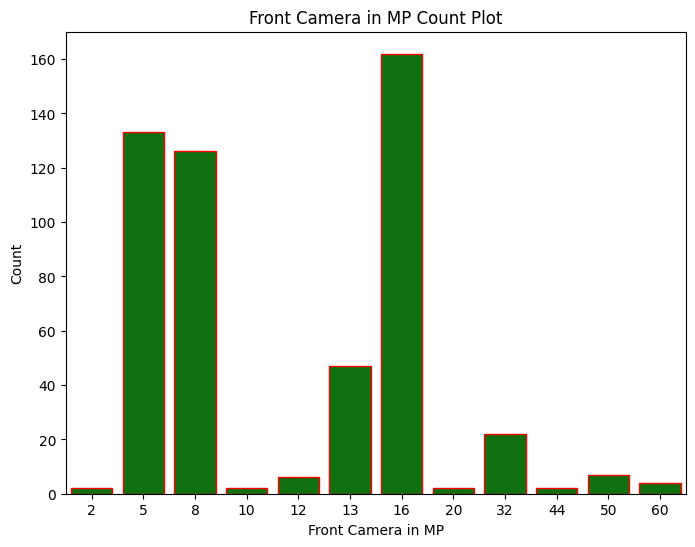

In [232]:
# FrontCameraMp count plot

plt.figure(figsize=(8, 6))
sns.countplot(x='FrontCameraMP',color='g',edgecolor='red', data=df)
plt.xlabel('Front Camera in MP')
plt.ylabel('Count')
plt.title('Front Camera in MP Count Plot')
plt.show()

#### Distplot for Mobile Height

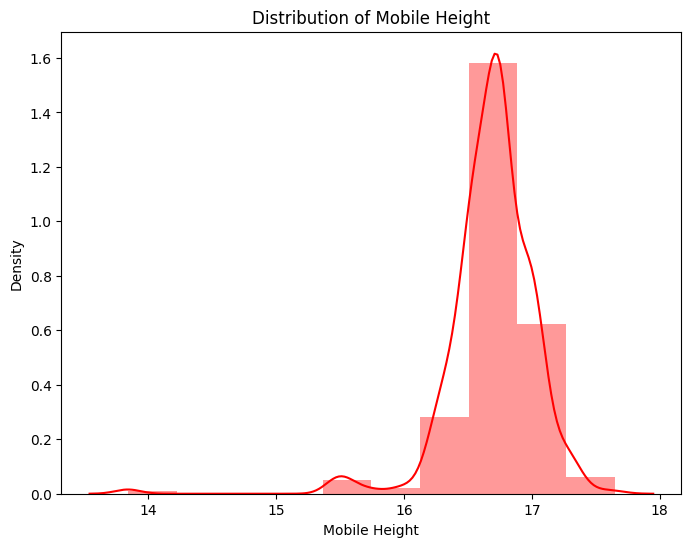

In [233]:
# Distplot for MobileHeight

plt.figure(figsize=(8, 6))
sns.distplot(df['MobileHeight'].dropna(),kde=True,color='red',bins=10)
plt.xlabel('Mobile Height')
plt.ylabel('Density')
plt.title('Distribution of Mobile Height')
plt.show()


#### Displot for Mobile Battery

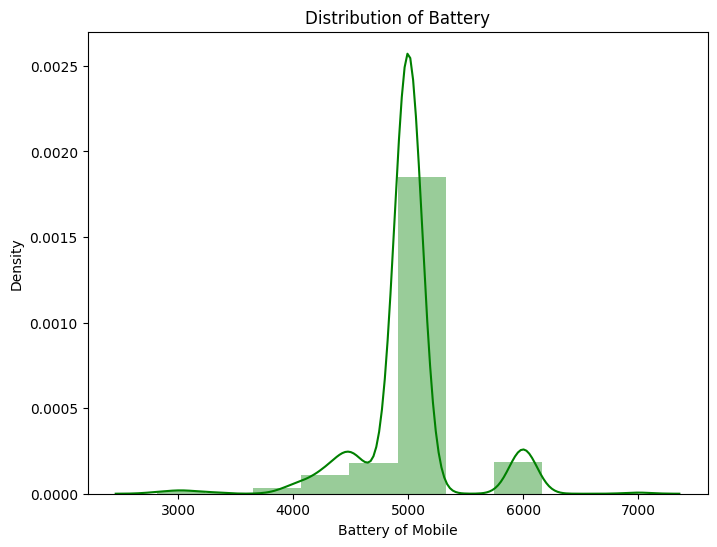

In [234]:
# Displot for Mobile Battery

plt.figure(figsize=(8, 6))
sns.distplot(df['Battery'].dropna(),kde=True,color='green',bins=10)
plt.xlabel('Battery of Mobile')
plt.ylabel('Density')
plt.title('Distribution of Battery')
plt.show()


#### Average Price by Company and ROM (Stacked Bar Chart)

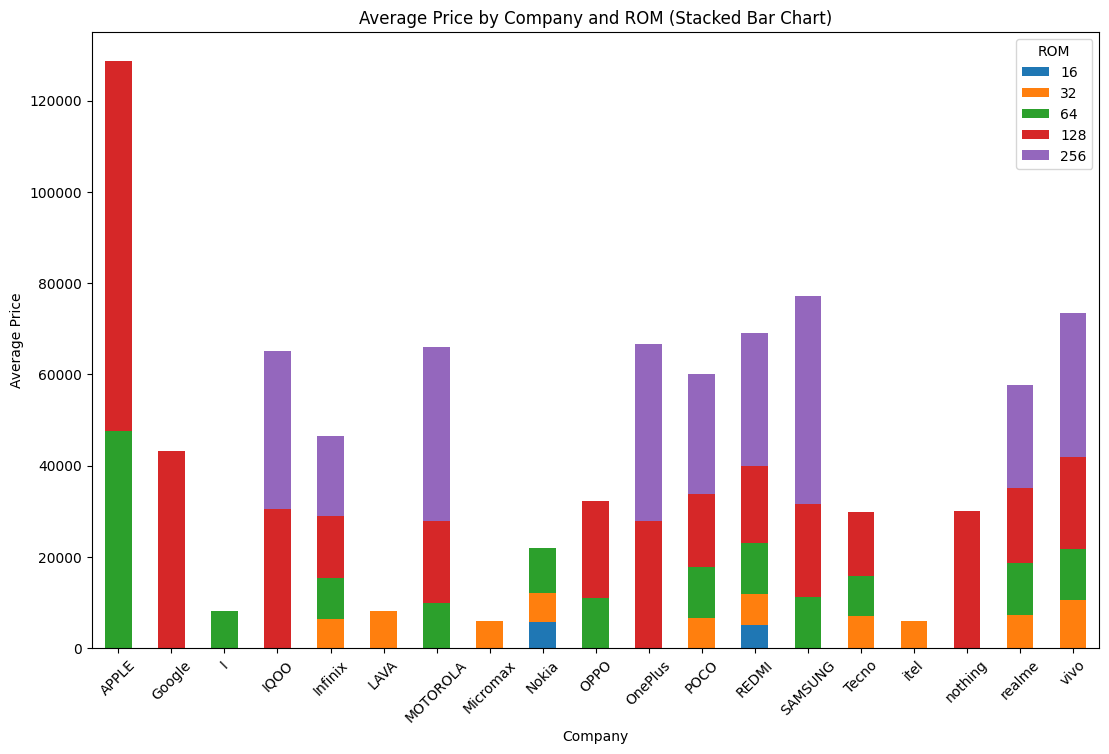

In [235]:
# Multivariate Analysis with Stacked Bar Chart

company_processor_price = df.groupby(['Company', 'ROM'])['Price'].mean().unstack()
company_processor_price.plot(kind='bar', stacked=True, figsize=(13, 8))
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.title('Average Price by Company and ROM (Stacked Bar Chart)')
plt.xticks(rotation=45)
plt.legend(title='ROM')
plt.show()

In [236]:
# Interpretation of the Stacked Bar Chart:

# 1. The chart visualizes the average phone price for each company, segmented by ROM size.
# 2.  It allows us to compare average prices across companies and see how ROM affects pricing within each company.
# 3.  The height of each segment represents the average price for a specific ROM within a particular company.
# 4.  We can observe trends like companies with larger segments in higher ROM categories generally having higher average prices.
# 5.  This type of visualization helps identify which companies offer phones with more expensive storage options and the overall price distribution across various ROM sizes.


#### Price Distribution by RAM (Histogram with Hue)

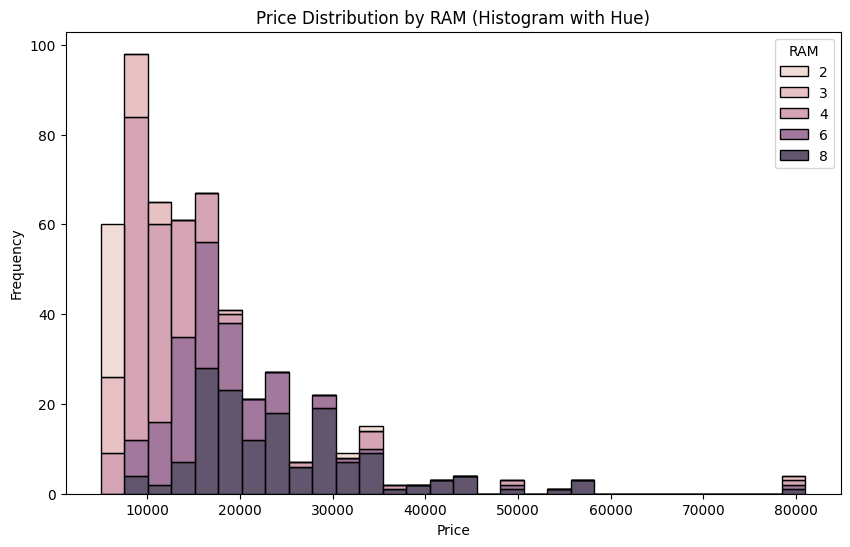

In [237]:
# Histogram with Hue
# Analyze the distribution of Price with different RAM sizes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', hue='RAM', multiple='stack')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution by RAM (Histogram with Hue)')
plt.show()

In [238]:
# interpretation

# The histogram shows the distribution of phone prices across different RAM sizes.
# It indicates that higher RAM sizes tend to be associated with higher prices.
# This suggests that phones with more RAM are generally more expensive, likely due to their increased performance and capabilities.


#### Battery Distribution by Company (Distplot with Hue)

<Figure size 2800x800 with 0 Axes>

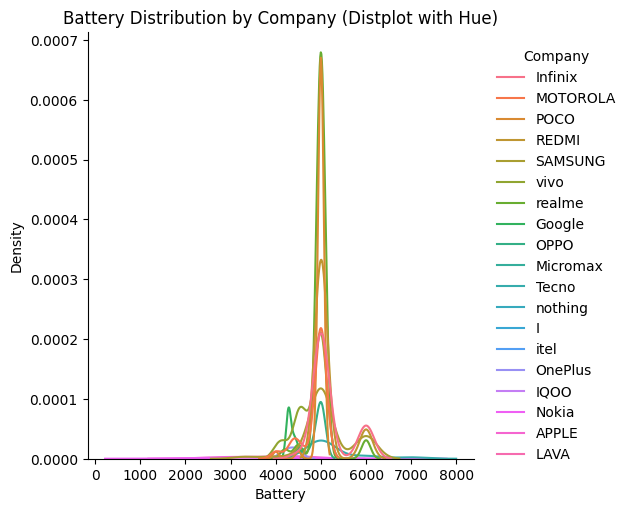

In [239]:
# Distplot with Hue
# Example: Analyze the distribution of Battery with different Companies
plt.figure(figsize=(28, 8))
sns.displot(data=df, x='Battery', hue='Company', kind='kde')
plt.xlabel('Battery')
plt.ylabel('Density')
plt.title('Battery Distribution by Company (Distplot with Hue)')
plt.show()

In [240]:
# interpretation

# The KDE plot shows the distribution of battery capacity for different phone companies.
# It helps compare how battery capacity varies across different phone brands.
# above plot suggest that most of the company offering 5000 mah batteries, and some offer 6000 mah.


In [241]:
df.head(5)

,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Price,Company,ModelName,Processor
0,Night Black,64,4,6000,13,5,1,16.76,7299,Infinix,SMART 7,Unisoc SC9863A1
1,Azure Blue,64,4,6000,13,5,1,16.76,7299,Infinix,SMART 7,Unisoc SC9863A1
2,Mineral Gray,128,8,5000,50,16,0,16.64,11999,MOTOROLA,G32,Qualcomm Snapdragon 680
3,Royal Blue,32,2,5000,8,5,0,16.56,5649,POCO,C50,MediaTekHelio A22
4,Marigold,128,8,5000,50,5,1,16.76,8999,Infinix,HOT 30i,MediaTekHelio G37


## Model Building

#### Label Encoder

In [242]:
# Create a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# List of columns to encode
categorical_cols = ['Colour','Company', 'Processor', 'ModelName']

# Apply label encoding to each column
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

df.head()


,Colour,ROM,RAM,Battery,RearCameraMP,FrontCameraMP,AILens,MobileHeight,Price,Company,ModelName,Processor
0,158,64,4,6000,13,5,1,16.76,7299,4,116,72
1,20,64,4,6000,13,5,1,16.76,7299,4,116,72
2,148,128,8,5000,50,16,0,16.64,11999,6,46,48
3,200,32,2,5000,8,5,0,16.56,5649,11,34,28
4,129,128,8,5000,50,5,1,16.76,8999,4,70,32


#### Correlation analysis using heatmap

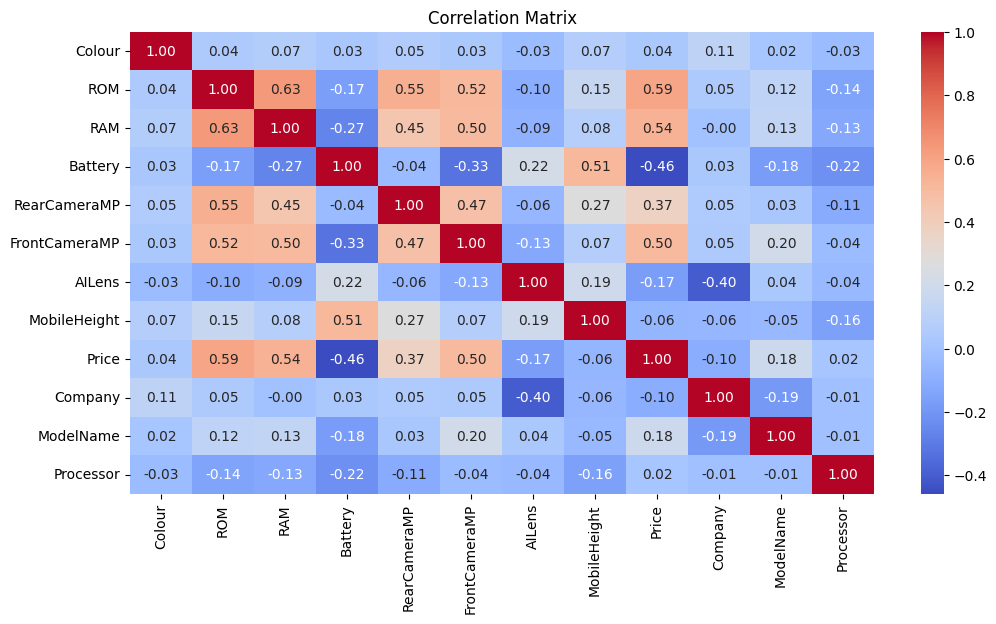

In [243]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [244]:
# Interpret the above correlation heatmap

print("Interpretation of the Correlation Heatmap:")
print("-" * 50)

print("\nKey Observations:")
print("1.  **Strong Positive Correlation:** A dark red/pink cell indicates a strong positive correlation (close to +1). For instance, if 'RAM' and 'Price' have a strong positive correlation, it means that as RAM increases, the price also tends to increase.")
print("2.  **Strong Negative Correlation:** A dark blue cell indicates a strong negative correlation (close to -1). If 'Battery' and 'MobileWeight' have a strong negative correlation, it means that as battery capacity increases, the phone's weight tends to decrease.")
print("3.  **No Correlation:** A white or near-white cell indicates a weak or no correlation (close to 0). This means that there is little to no linear relationship between the two variables.")

print("\nInsights from the Heatmap:")
print(" - **Price Correlation:** The heatmap could show which features are most strongly correlated with the 'Price' of a phone. For instance, features like RAM, ROM, Battery, and FrontCameraMP might have a strong positive correlation with price, meaning phones with higher RAM, ROM, Battery and FrontCameraMP tend to be more expensive.")
print(" - **Feature Relationships:** The heatmap can also help identify relationships between other features. For instance, if 'RAM' and 'Processor' have a strong positive correlation, it means that higher-performance processors are often paired with larger RAM sizes.")
print(" - **Redundancy:** Highly correlated features might indicate some redundancy in the data. If two features are very similar, we may consider removing one to avoid multicollinearity in the model building process.")
print(" - **Feature Importance:** The correlation with the target variable (Price in this case) can give us an idea of which features are potentially more important for predicting the target variable.")


Interpretation of the Correlation Heatmap:
--------------------------------------------------

Key Observations:
1.  **Strong Positive Correlation:** A dark red/pink cell indicates a strong positive correlation (close to +1). For instance, if 'RAM' and 'Price' have a strong positive correlation, it means that as RAM increases, the price also tends to increase.
2.  **Strong Negative Correlation:** A dark blue cell indicates a strong negative correlation (close to -1). If 'Battery' and 'MobileWeight' have a strong negative correlation, it means that as battery capacity increases, the phone's weight tends to decrease.
3.  **No Correlation:** A white or near-white cell indicates a weak or no correlation (close to 0). This means that there is little to no linear relationship between the two variables.

Insights from the Heatmap:
 - **Price Correlation:** The heatmap could show which features are most strongly correlated with the 'Price' of a phone. For instance, features like RAM, ROM, Batt

#### Split the Data

In [245]:
# Split the data into features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

### Feature Selection

In [246]:
# Apply selectKbest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression,k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concatenate two dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs       Score
1            ROM  274.947882
2            RAM  214.187957
5  FrontCameraMP  173.242537
3        Battery  136.761056
4   RearCameraMP   81.317429
9      ModelName   17.260091
6         AILens   15.608216
8        Company    5.496653
7   MobileHeight    2.085682
0         Colour    0.661240


#### Split the Data into Training and Testing

In [247]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [248]:
X_train.shape

(360, 11)

In [249]:
X_test.shape

(155, 11)

#### Linear Regression

In [250]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
L_reg = LinearRegression()

#### Train the Linear Regression Model

In [251]:
# Train the model on the training data
L_reg.fit(X_train, y_train)

LinearRegression()

#### prediction of Linear Regression Model

In [252]:
# Make predictions on the test data
y_pred_L_reg = L_reg.predict(X_test)

#### Linear Regression Model Evaluations

In [253]:
# Evaluate the model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [254]:
# Calculate mean squared error (for regression)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_L_reg))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 8576.836807786005


In [255]:
# Calculate R-squared
r2_L_reg = r2_score(y_test, y_pred_L_reg)
print(f"R-squared: {r2_L_reg }")


R-squared: 0.4361445779459602


### Dimensionality Reduction using PCA

In [256]:

# principal component analysis

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your feature data

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print explained variance ratio
print(pca.explained_variance_ratio_)

# Print the number of principal components
print(f"Number of principal components: {X_train_pca.shape[1]}")

# Now you can use X_train_pca and X_test_pca as your features for modeling

print(pca.explained_variance_)


[0.25786267 0.17102018 0.13461953 0.09139637 0.08013331 0.07507054
 0.04836522 0.04450012 0.03827111 0.03232309]
Number of principal components: 10
[2.84439047 1.88646214 1.48493965 1.00816051 0.8839217  0.82807614
 0.53349933 0.4908648  0.42215488 0.35654442]


#### Polynomial Regression

In [257]:
# polynomial regresion

import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train a linear regression model with polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluate the model
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - Root Mean Squared Error: {rmse_poly}")
print(f"Polynomial Regression - R-squared: {r2_poly}")


Polynomial Regression - Root Mean Squared Error: 7446.463623247254
Polynomial Regression - R-squared: 0.5749758456572862


#### Decision Tree Regression

In [258]:
# decision tree regresion

import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
dt_reg = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_reg.predict(X_test)

# Evaluate the model
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression - Root Mean Squared Error: {rmse_dt}")
print(f"Decision Tree Regression - R-squared: {r2_dt}")


Decision Tree Regression - Root Mean Squared Error: 3687.5051182031184
Decision Tree Regression - R-squared: 0.895773361560515


#### Support Vector Regressor

In [259]:
# support vector regressor

import numpy as np
from sklearn.svm import SVR

# Create an SVR model
svr_reg = SVR(kernel='linear')  # You can experiment with different kernels (linear, rbf, poly)

# Train the model on the training data
svr_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svr = svr_reg.predict(X_test)

# Evaluate the model
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - Root Mean Squared Error: {rmse_svr}")
print(f"Support Vector Regression - R-squared: {r2_svr}")


Support Vector Regression - Root Mean Squared Error: 9156.566705311025
Support Vector Regression - R-squared: 0.357343662675913


#### Ridge Regression

In [260]:
# ridge regression

import numpy as np
from sklearn.linear_model import Ridge

# Create a Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Train the model on the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Root Mean Squared Error: {rmse_ridge}")
print(f"Ridge Regression - R-squared: {r2_ridge}")


Ridge Regression - Root Mean Squared Error: 8580.73135403561
Ridge Regression - R-squared: 0.435632393877067


#### Lasso Regression

In [261]:
# lasso regression

import numpy as np
from sklearn.linear_model import Lasso

# Create a Lasso Regression model
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Train the model on the training data
lasso_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - Root Mean Squared Error: {rmse_lasso}")
print(f"Lasso Regression - R-squared: {r2_lasso}")


Lasso Regression - Root Mean Squared Error: 8577.028281072082
Lasso Regression - R-squared: 0.4361194021246022


# Ensemble Model

In [262]:
# Random forest regression

import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest Regression - R-squared: {r2_rf}")


Random Forest Regression - Root Mean Squared Error: 3399.1421519929645
Random Forest Regression - R-squared: 0.9114370403414574


#### Ada Boost Regressor with Random Forest Regression

In [263]:
!pip install scikit-learn --upgrade
# Update scikit-learn to the latest version to ensure the 'base_estimator' argument is available.

from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor #Import DecisionTreeRegressor


# Create an AdaBoostRegressor model with a RandomForestRegressor as the base estimator
# If you want to specify a DecisionTreeRegressor, do it like this:
# base_estimator = DecisionTreeRegressor(max_depth=3)
# Otherwise, this line will use the RandomForestRegressor:
ada_rf_reg = AdaBoostRegressor(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_estimators=50, random_state=42) # changed base_estimator to estimator

# Train the model on the training data
ada_rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ada_rf = ada_rf_reg.predict(X_test)

# Evaluate the model
rmse_ada_rf = np.sqrt(mean_squared_error(y_test, y_pred_ada_rf))
r2_ada_rf = r2_score(y_test, y_pred_ada_rf)

print(f"AdaBoost with Random Forest Regression - Root Mean Squared Error: {rmse_ada_rf}")
print(f"AdaBoost with Random Forest Regression - R-squared: {r2_ada_rf}")

AdaBoost with Random Forest Regression - Root Mean Squared Error: 2411.709667148367
AdaBoost with Random Forest Regression - R-squared: 0.9554175926375061


### Display All Models Evaluations Metrices

In [264]:
# Display above all the metrices in table with model name

# Create a dictionary to store the model names and metrics
model_metrics = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Decision Tree Regression',
              'Support Vector Regression', 'Ridge Regression', 'Lasso Regression',
              'Random Forest Regression', 'Random Forest with AdaBoost'],
    'RMSE': [rmse, rmse_poly, rmse_dt, rmse_svr, rmse_ridge, rmse_lasso, rmse_rf, rmse_ada_rf],
    'R-squared': [r2_L_reg, r2_poly, r2_dt, r2_svr, r2_ridge, r2_lasso, r2_rf, r2_ada_rf]
}

# Create a pandas DataFrame from the dictionary
metrics_df = pd.DataFrame(model_metrics)

# Display the DataFrame
print(metrics_df)


                         Model         RMSE  R-squared
0            Linear Regression  8576.836808   0.436145
1        Polynomial Regression  7446.463623   0.574976
2     Decision Tree Regression  3687.505118   0.895773
3    Support Vector Regression  9156.566705   0.357344
4             Ridge Regression  8580.731354   0.435632
5             Lasso Regression  8577.028281   0.436119
6     Random Forest Regression  3399.142152   0.911437
7  Random Forest with AdaBoost  2411.709667   0.955418


### Visualization of all Model Metrices Table

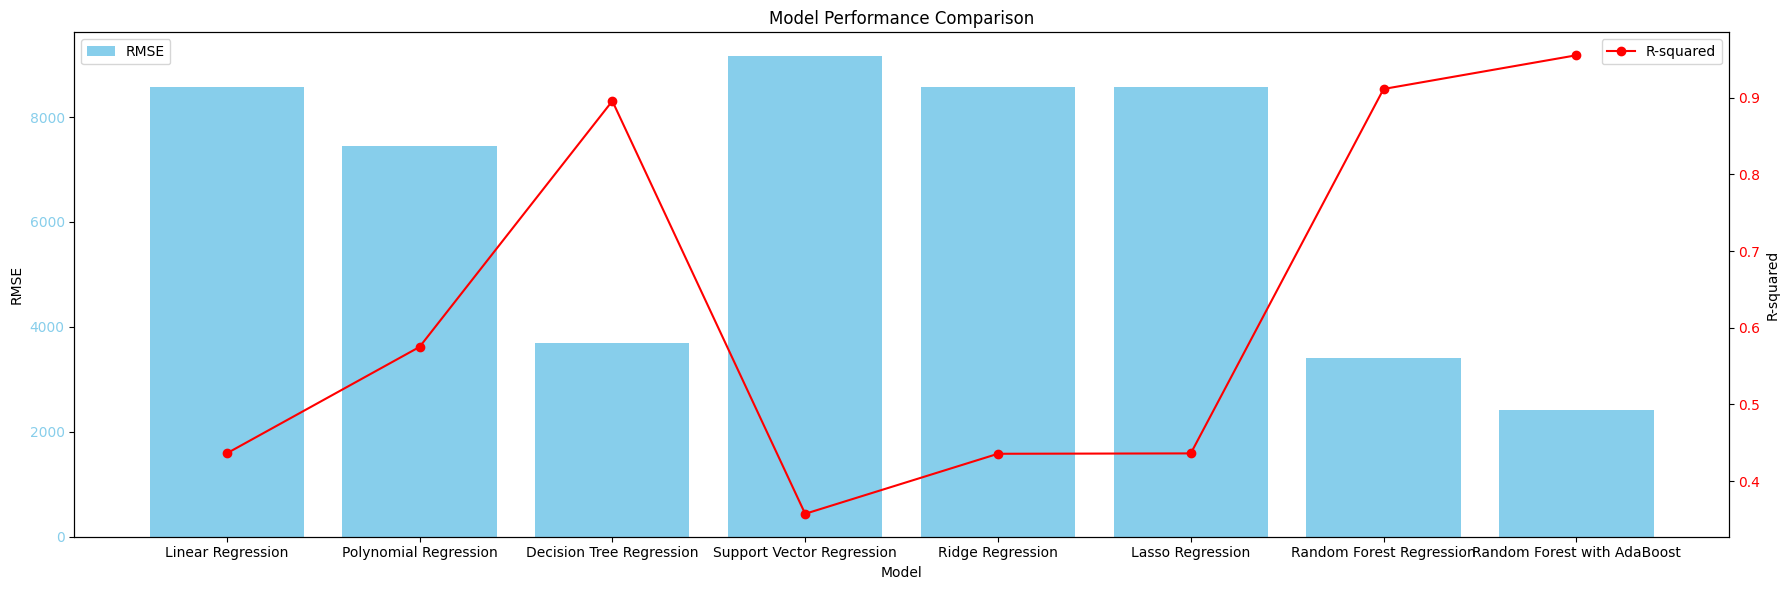

In [265]:
# visualize the above  Display above all the metrices in table with model name

# Assuming 'metrics_df' is your DataFrame containing model metrics
# Create a bar plot to visualize RMSE and R-squared for each model

fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot RMSE
ax1.bar(metrics_df['Model'], metrics_df['RMSE'], color='skyblue', label='RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Model')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.legend(loc='upper left')

# Create a secondary y-axis for R-squared
ax2 = ax1.twinx()
ax2.plot(metrics_df['Model'], metrics_df['R-squared'], color='red', marker='o', label='R-squared')
ax2.set_ylabel('R-squared')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Evaluation of Ada Boost Regressor with Random Forest Regression

In [266]:

# Evaluations

# Assuming you have y_test and y_pred from your chosen model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_ada_rf)
mse = mean_squared_error(y_test, y_pred_ada_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ada_rf)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 1547.17
Mean Squared Error (MSE): 5816343.52
Root Mean Squared Error (RMSE): 2411.71
R-squared (R2): 0.96


### Visualization of Actual Price v Predicted Price of Best fitted Model AdaBoostRegressor with RandomForestRegressor

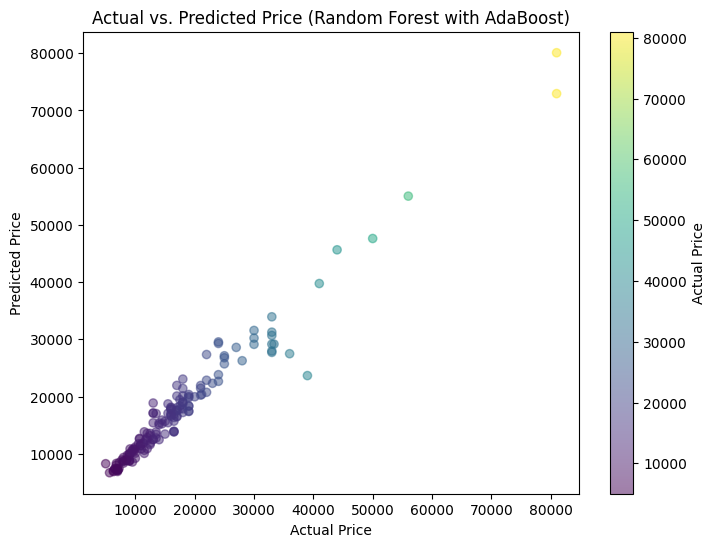

In [267]:
# You can also visualize the predicted vs. actual values using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ada_rf,c=y_test, cmap='viridis', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price (Random Forest with AdaBoost)")
plt.colorbar(label='Actual Price')  # Add a colorbar to indicate the actual price
plt.show()

In [269]:
# Final conclusion and give the insights, recmondations etc

print("## Final Conclusion and Insights")
print("Based on the analysis and model building, we can draw the following conclusions:")

print("\n**Insights:**")
print("- **RAM and ROM are key factors impacting the price.** Phones with higher RAM and ROM are generally more expensive.")
print("- **Processor type influences price.** Models with high-end processors tend to have a higher average price.")
print("- **Company and model name significantly contribute to the price variation.** Certain companies and models are associated with higher average prices.")
print("- **Battery and Mobile Height have a lesser impact on price but some models with larger batteries are slightly more expensive.**")
print("- **The models with AILens = 1 are expensive than models with AILens = 0.**")
print("- **The most used processors are Octa-core and Quad-core which are less expensive than others.**")

print("\nKey Observations for Qalcomm Snapdragon Processor:")
print("1.  **Snapdragon 8 Gen 2, 8+ Gen 1, 8 Gen 1** exhibit a higher average price, suggesting they are incorporated into more premium devices.")
print("2.  **Snapdragon 888Plus, 865, 888, 7+Gen2** have a relatively moderate average price.")
print("3.  **Processors like Snapdragon 439, 720G, 680, 685, 750G** are positioned at the lower end of the price spectrum.")

print("2.  **MediaTek Dimensity 8200** also holds a high average price point, indicating that it's likely a powerful processor for this camera configuration.")
print("3.  **Other processors like Snapdragon 8Gen1, Exynos 1380, and Dimensity 8100** demonstrate a similar trend.")
print("4.  **Processors lower down on the list** might represent more budget-friendly or less powerful options.")

print("4.  **we observe that Unisoc Processor is budget friendly Processor and we see mostly Unisoc T616, T700, T612 are used by Mobile Company.")

print("\nKey Observations for 50MP rear camera phone:")
print("1.  **Qualcomm Snapdragon 8Gen2** appears to be at the top end of the price range among processors for 50MP camera phones. This signifies that it's potentially a high-performance processor that is incorporated into premium devices with advanced features.")

print("Recommendation based on Top 5 Companies with Most Mobile Models:")
print("\nKey Observations:")
print("1. **realme** has a significantly larger number of models in the dataset, highlighting its dominance in midrange phone and extensive product range.")
print("2. **REDMI** holds the second position, suggesting a substantial presence in the market with a diverse portfolio of phone models.")

print("\n**Model Performance:**")
print("- We have tried several models (linear regression, polynomial regression, decision tree regression, support vector regression, ridge regression, lasso regression, random forest regression, random forest with adaboost) to predict the price of mobile phones.")
print("- The **Random Forest Regression model** with adaboost shows a better performance among the models.")
print("- The **Random Forest Regression with AdaBoost** have the lowest Root Mean Squared Error (RMSE) and highest R-squared.")
print("- The improvement in accuracy is due to the combination of multiple tree estimators, which helps to reduce variance and increase the robustness of the model.")

print("\n**Recommendations:**")
print("- **Feature Engineering:** Explore more advanced feature engineering techniques to create new features that better capture the relationship between the predictors and the target variable. For example, creating interactive features that account for the interplay of different variables.")
print("- **Hyperparameter Tuning:** Utilize more efficient techniques for hyperparameter tuning and try various combinations of hyperparameters to further optimize the model's performance.")
print("- **Ensemble Methods:** Experiment with other ensemble methods, such as gradient boosting or stacking, to see if they offer a more significant performance improvement.")
print("- **Data Collection:** More accurate and robust data can lead to more reliable models. Focus on collecting accurate mobile data, including new features and variables if available.")


print("\n**Overall:**")
print("The models have displayed decent performance. Improvements can be achieved by addressing the recommendations mentioned above.")
print("This information can help companies set prices and understand the factors that influence the market's pricing.")



## Final Conclusion and Insights
Based on the analysis and model building, we can draw the following conclusions:

**Insights:**
- **RAM and ROM are key factors impacting the price.** Phones with higher RAM and ROM are generally more expensive.
- **Processor type influences price.** Models with high-end processors tend to have a higher average price.
- **Company and model name significantly contribute to the price variation.** Certain companies and models are associated with higher average prices.
- **Battery and Mobile Height have a lesser impact on price but some models with larger batteries are slightly more expensive.**
- **The models with AILens = 1 are expensive than models with AILens = 0.**
- **The most used processors are Octa-core and Quad-core which are less expensive than others.**

Key Observations for Qalcomm Snapdragon Processor:
1.  **Snapdragon 8 Gen 2, 8+ Gen 1, 8 Gen 1** exhibit a higher average price, suggesting they are incorporated into more premium devices.
2.  *